In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

vehicle wise - downtime, issues and count of issues, span of issue 

In [2]:
data=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/Service Record-Grid view (1).csv")

In [3]:
data['Registration Number'].nunique()

613

613 cars total went to 

In [4]:
data['Date Sent'] = pd.to_datetime(data['Date Sent'], dayfirst=True, errors='coerce')

# Create a new column for the month
data['Month'] = data['Date Sent'].dt.month

# Display the updated DataFrame
print(data)

      SL No. Registration Number Delivery Date (from Registration Number)  \
0          1           WB07K0548                                1/10/2022   
1          2           WB05A0177                                25/1/2023   
2          3           WB05A0881                                25/5/2023   
3          4           WB05A0911                                30/5/2023   
4          5           WB07K0251                                22/7/2022   
...      ...                 ...                                      ...   
2332    2394           WB05A0893                                29/5/2023   
2333    2395           WB07K2080                               23/12/2023   
2334    2396           WB04J2467                               28/11/2023   
2335    2397           WB05A1878                               27/11/2023   
2336    2398           WB05A0857                                 3/6/2023   

      Current Vehicle Age in Months            Model         Hub  Date Sent

In [5]:
data['Month']

0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
2332    NaN
2333    5.0
2334    5.0
2335    5.0
2336    NaN
Name: Month, Length: 2337, dtype: float64

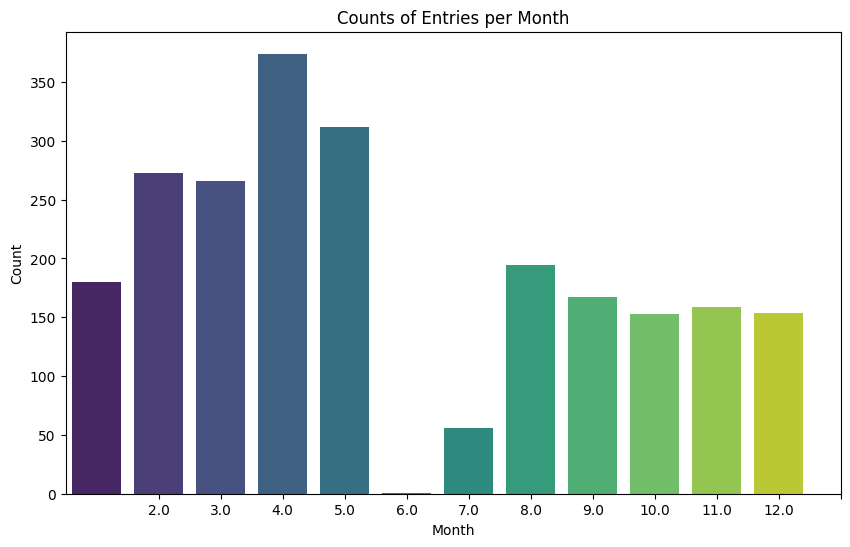

In [6]:
import seaborn as sns
month_counts = data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Entries per Month')
plt.xticks(month_counts.index)  
plt.show()

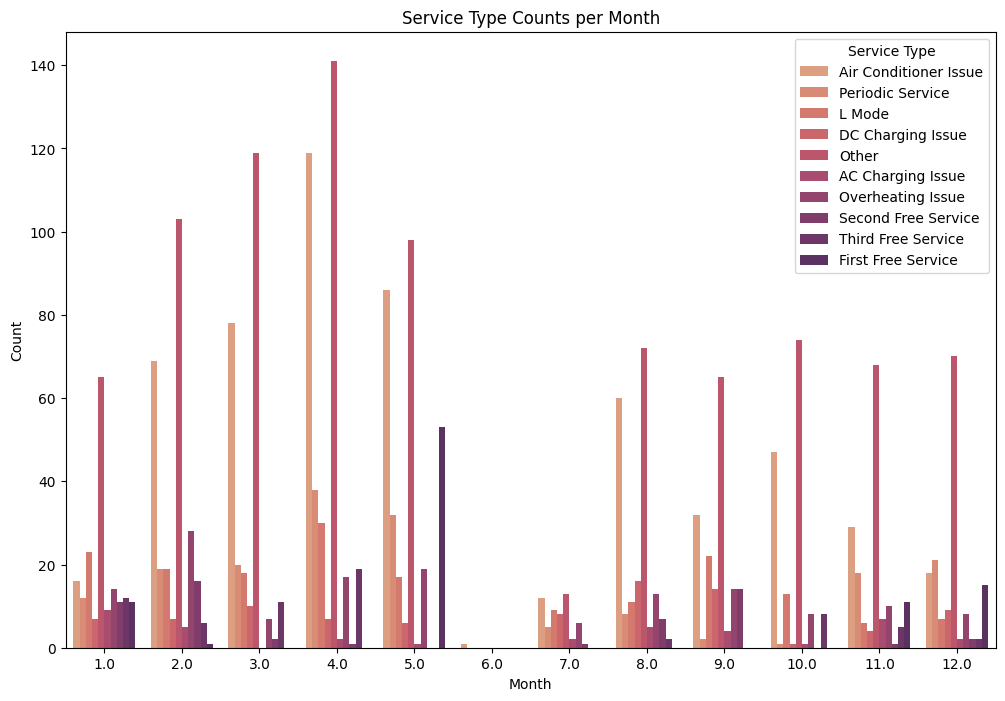

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Month', hue='Service Type', palette='flare')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Service Type Counts per Month')
plt.legend(title='Service Type')
plt.show()

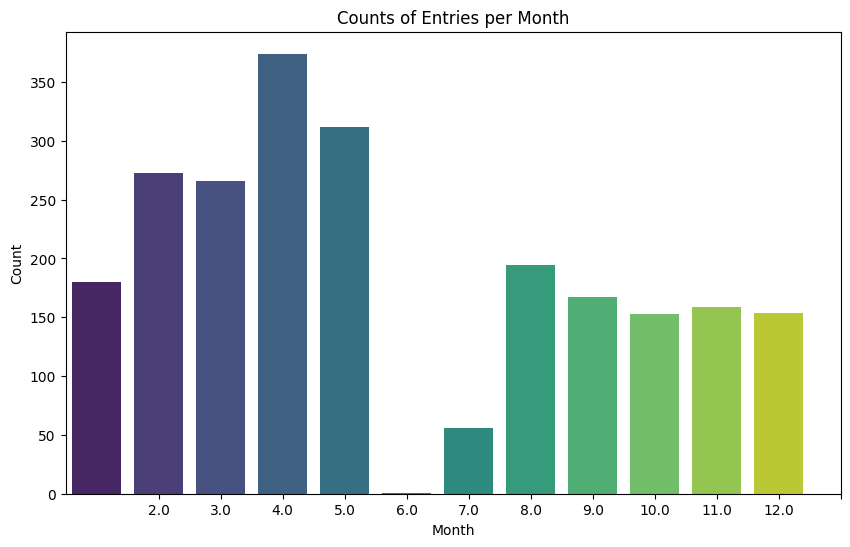

In [8]:
month_counts = data['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Counts of Entries per Month')
plt.xticks(month_counts.index)  
plt.show()

In [9]:
data['Service Type']

0       Air Conditioner Issue
1       Air Conditioner Issue
2            Periodic Service
3                      L Mode
4       Air Conditioner Issue
                ...          
2332    Air Conditioner Issue
2333    Air Conditioner Issue
2334    Air Conditioner Issue
2335                    Other
2336    Air Conditioner Issue
Name: Service Type, Length: 2337, dtype: object

In [10]:
data['Service Type'].value_counts()

Service Type
Other                    910
Air Conditioner Issue    578
Periodic Service         180
L Mode                   176
Overheating Issue        147
First Free Service        93
DC Charging Issue         89
Third Free Service        66
Second Free Service       55
AC Charging Issue         41
Name: count, dtype: int64

600 mei 2200

issue_counts = data.pivot_table(index='Registration Number', columns='Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

for reg_num, issues in issue_counts_dict.items():
    print(f"{reg_num}: {issues}")

issue_counts = data.pivot_table(index='Registration Number', columns='Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

issue_counts_list = []

for reg_num, issues in issue_counts_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

for entry in issue_counts_list:
    print(entry)


processed_dict = {}

for reg_num, issues in issue_counts_dict.items():
    # Filter out keys with values of 0
    filtered_issues = {k: v for k, v in issues.items() if v != 0}
    # Calculate the total of non-zero values
    total = sum(filtered_issues.values())
    # Add the total to the dictionary
    filtered_issues['Total'] = total
    # Store the processed dictionary
    processed_dict[reg_num] = filtered_issues

# Convert the processed dictionary to a list of formatted strings
issue_counts_list = []

for reg_num, issues in processed_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

# Print the resulting list
for entry in issue_counts_list:
    print(entry)

In [11]:
issue_counts = data.pivot_table(index='Registration Number', columns='Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

for reg_num, issues in issue_counts_dict.items():
    print(f"{reg_num}: {issues}")

WB04J0905: {'AC Charging Issue': 0, 'Air Conditioner Issue': 2, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 0, 'Other': 4, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0909: {'AC Charging Issue': 0, 'Air Conditioner Issue': 5, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 0, 'Other': 2, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0910: {'AC Charging Issue': 0, 'Air Conditioner Issue': 3, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 1, 'Other': 3, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0915: {'AC Charging Issue': 0, 'Air Conditioner Issue': 4, 'DC Charging Issue': 0, 'First Free Service': 0, 'L Mode': 1, 'Other': 2, 'Overheating Issue': 0, 'Periodic Service': 0, 'Second Free Service': 0, 'Third Free Service': 0}
WB04J0925: {'AC Charging Issue': 0, 'Air Conditioner Iss

In [12]:
data['Registration Number'].value_counts()[data['Registration Number'].value_counts()==5].index

Index(['WB07K0521', 'WB07K0361', 'WB05A0912', 'WB07K0276', 'WB07K0498',
       'WB05A0216', 'WB07K2080', 'WB07K1475', 'WB07K1264', 'WB07K0347',
       'WB05A0949', 'WB05A0879', 'WB05A0934', 'WB05A0330', 'WB07K0465',
       'WB07K1018', 'WB07K1289', 'WB05A2158', 'WB07K1526', 'WB07K1165',
       'WB05A0908', 'WB07K0456', 'WB07K0530', 'WB05A0250', 'WB05A0852',
       'WB07K0257', 'WB07K0433', 'WB07K0581', 'WB07K1138', 'WB07K1175',
       'WB05A1669', 'WB05A0239', 'WB07K1203', 'WB05A1636', 'WB07K0524',
       'WB05A0857', 'WB07K0297', 'WB05A0868', 'WB04J2211', 'WB07K1162',
       'WB07K0457', 'WB07K0472', 'WB05A1744', 'WB07K1222', 'WB07K0455',
       'WB05A0881', 'WB05A0271', 'WB07K0337', 'WB07K1267', 'WB04J0931',
       'WB07K0499', 'WB07K0484', 'WB07K1023', 'WB07K1464', 'WB04J0987'],
      dtype='object', name='Registration Number')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2337 non-null   int64         
 1   Registration Number                                       2335 non-null   object        
 2   Delivery Date (from Registration Number)                  2335 non-null   object        
 3   Current Vehicle Age in Months                             2335 non-null   float64       
 4   Model                                                     2335 non-null   object        
 5   Hub                                                       2335 non-null   object        
 6   Date Sent                                                 2289 non-null   datetime64[ns]
 7   Date Received                             

In [58]:
data['Service Type'].unique()

array(['Air Conditioner Issue', 'Periodic Service', 'L Mode',
       'DC Charging Issue', 'Other', 'AC Charging Issue',
       'Overheating Issue', 'Second Free Service', 'Third Free Service',
       'First Free Service', nan], dtype=object)

In [46]:
hub_per_registration = data.groupby("Registration Number")["Hub"].unique()


In [47]:
hub_df = hub_per_registration.reset_index()


In [48]:
hub_df

,Registration Number,Hub
0,WB04J0905,[O2]
1,WB04J0909,[O2]
2,WB04J0910,[O2]
3,WB04J0915,[O2]
4,WB04J0925,[O2]
...,...,...
608,WB19L7529,[EVRE]
609,WB19L7534,[EVRE]
610,WB19L7538,[EVRE]
611,WB19L7549,[EVRE]


In [49]:
hub_df.to_excel('Hub of each car.xlsx',index=True)

In [13]:
data['Registration Number'].value_counts().describe()

count    613.000000
mean       3.809135
std        2.562509
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       15.000000
Name: count, dtype: float64

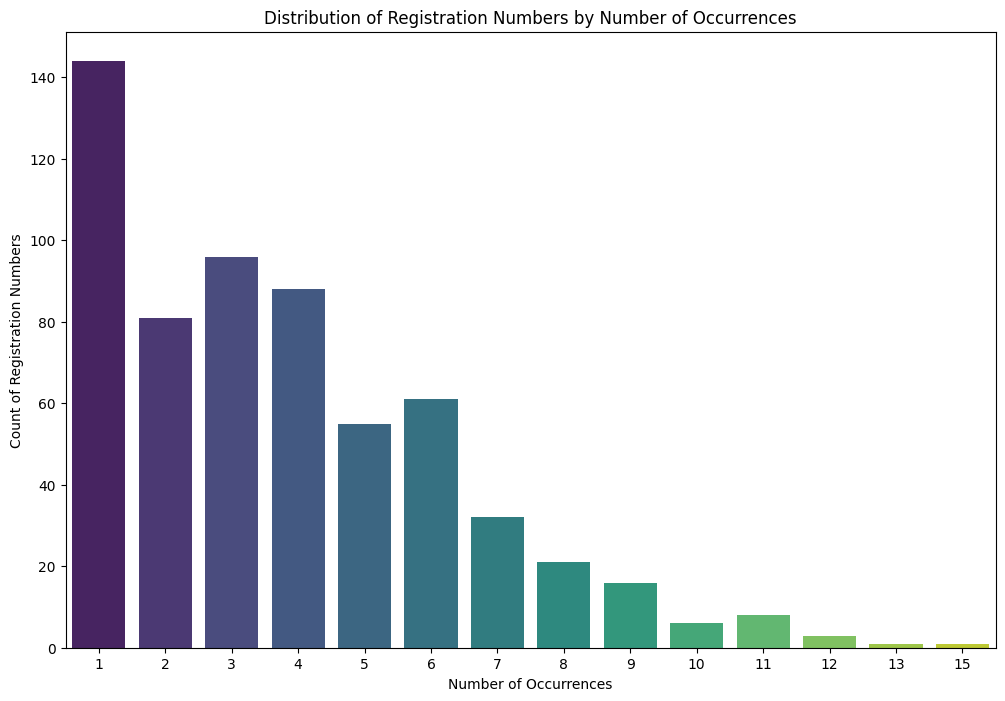

In [14]:
registration_counts = data['Registration Number'].value_counts()

count_of_counts = registration_counts.value_counts()

sorted_count_of_counts = count_of_counts.sort_index(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_count_of_counts.index, y=sorted_count_of_counts.values, palette='viridis')
plt.xlabel('Number of Occurrences')
plt.ylabel('Count of Registration Numbers')
plt.title('Distribution of Registration Numbers by Number of Occurrences')
plt.show()

In [15]:
data['Model'].value_counts()

Model
Xpres-T Ziptron    1383
Xpres-T Electra     795
eC3                 157
Name: count, dtype: int64

In [16]:
unique_vendors_per_vehicle = data.groupby('Registration Number')['Service Vendors'].nunique()
print(unique_vendors_per_vehicle)

Registration Number
WB04J0905    2
WB04J0909    3
WB04J0910    3
WB04J0915    3
WB04J0925    2
            ..
WB19L7529    1
WB19L7534    1
WB19L7538    1
WB19L7549    1
WB19L7693    1
Name: Service Vendors, Length: 613, dtype: int64


In [17]:
unique_vendors_per_vehicle.to_excel('unique_vendors_per_vehicle.xlsx',index=True)

In [18]:
unique_vendors_per_vehicle.mean()

1.6851549755301793

In [57]:
data.groupby(['Service Vendors','Service Type']).value_counts()

Service Vendors           Service Type  SL No.  Registration Number  Delivery Date (from Registration Number)  Current Vehicle Age in Months  Model            Hub          Date Sent   Date Received  Received Month/Year  Vehicle Age At Service Time  Downtime  Other's Data                                              Approval Status  Invoice Number    Invoice Amount  Invoice                                                                                                                                                                                                                                                                                                                            Invoice Payment Status  Created By            Created            Last Modified By  Last Modified      Hub Manager Emails (from Hub) (from Registration Number)                                                      Rejection Reason     Sent Month/Year  Maintenance Remarks           Service KM Reading  Vehicle S

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2337 non-null   int64         
 1   Registration Number                                       2335 non-null   object        
 2   Delivery Date (from Registration Number)                  2335 non-null   object        
 3   Current Vehicle Age in Months                             2335 non-null   float64       
 4   Model                                                     2335 non-null   object        
 5   Hub                                                       2335 non-null   object        
 6   Date Sent                                                 2289 non-null   datetime64[ns]
 7   Date Received                             

In [67]:
data['Date Sent'] = pd.to_datetime(data['Date Sent'], errors='coerce')
data['YearMonth'] = data['Date Sent'].dt.to_period('M')
service_counts = data.groupby(['Registration Number', 'YearMonth']).size().reset_index(name='Service Count')
more_than_twice = service_counts[service_counts['Service Count'] > 1]
print(more_than_twice)


     Registration Number YearMonth  Service Count
3              WB04J0905   2024-02              2
7              WB04J0909   2024-03              2
9              WB04J0909   2024-05              2
12             WB04J0910   2023-12              2
18             WB04J0915   2024-04              2
...                  ...       ...            ...
1771           WB07K1526   2023-11              2
1779           WB07K1810   2023-12              2
1780           WB07K1810   2024-01              2
1785           WB07K1813   2024-05              2
1824           WB19L7423   2024-02              2

[370 rows x 3 columns]


In [80]:
service_counts = data.groupby(['Registration Number', 'YearMonth']).size().reset_index(name='Service Count')
more_than_once = service_counts[service_counts['Service Count'] > 1]
month_wise_count = more_than_once.groupby('YearMonth').size().reset_index(name='Count')

In [81]:
month_wise_count

,YearMonth,Count
0,2023-07,3
1,2023-08,40
2,2023-09,26
3,2023-10,23
4,2023-11,17
5,2023-12,18
6,2024-01,29
7,2024-02,49
8,2024-03,41
9,2024-04,78


In [82]:
month_wise_count.to_excel('monthwisecoutn.xlsx',index=True)

In [83]:
service_type_counts = data.groupby(['Registration Number', 'YearMonth', 'Service Type']).size().reset_index(name='Service Count')

# Filter the results to find registration numbers with more than one service in a given month with the same 'Service Type'
more_than_once_service_type = service_type_counts[service_type_counts['Service Count'] > 1]

# Group by 'YearMonth' and 'Service Type' and count the occurrences
month_wise_service_type_count = more_than_once_service_type.groupby(['YearMonth', 'Service Type']).size().reset_index(name='Count')

# Display the results
print(month_wise_service_type_count)

   YearMonth           Service Type  Count
0    2023-07                 L Mode      1
1    2023-08      AC Charging Issue      1
2    2023-08  Air Conditioner Issue      9
3    2023-08      DC Charging Issue      1
4    2023-08                 L Mode      1
5    2023-08                  Other     12
6    2023-09      DC Charging Issue      4
7    2023-09                 L Mode      3
8    2023-09                  Other      7
9    2023-09      Overheating Issue      1
10   2023-10  Air Conditioner Issue      6
11   2023-10                 L Mode      2
12   2023-10                  Other      6
13   2023-10     Third Free Service      1
14   2023-11  Air Conditioner Issue      2
15   2023-11                 L Mode      1
16   2023-11                  Other      7
17   2023-11       Periodic Service      1
18   2023-12      DC Charging Issue      1
19   2023-12                  Other      6
20   2023-12      Overheating Issue      1
21   2023-12       Periodic Service      3
22   2024-0

In [84]:
service_type_counts = data.groupby(['Registration Number', 'YearMonth', 'Service Type']).size().reset_index(name='Service Count')

# Filter the results to find registration numbers with more than one service in a given month with the same 'Service Type'
more_than_once_service_type = service_type_counts[service_type_counts['Service Count'] > 1]

# Group by 'YearMonth' and 'Service Type' and aggregate the counts into a list
month_wise_service_type_count = more_than_once_service_type.groupby('YearMonth').agg({'Service Type': lambda x: list(x)}).reset_index()

# Display the results
print(month_wise_service_type_count)

   YearMonth                                       Service Type
0    2023-07                                           [L Mode]
1    2023-08  [Other, Air Conditioner Issue, Air Conditioner...
2    2023-09  [Other, DC Charging Issue, L Mode, Other, DC C...
3    2023-10  [Other, Other, Air Conditioner Issue, Air Cond...
4    2023-11  [Other, Other, Other, L Mode, Other, Other, Ot...
5    2023-12  [Other, Overheating Issue, DC Charging Issue, ...
6    2024-01  [Air Conditioner Issue, Overheating Issue, Thi...
7    2024-02  [Other, Other, Other, Air Conditioner Issue, O...
8    2024-03  [L Mode, Other, Air Conditioner Issue, Air Con...
9    2024-04  [Air Conditioner Issue, L Mode, Air Conditione...
10   2024-05  [Air Conditioner Issue, Other, Other, Other, O...


In [85]:
month_wise_service_type_count.to_excel('happyness.xlsx',index=True)

In [86]:
service_type_counts = data.groupby(['Registration Number', 'YearMonth', 'Service Type']).size().reset_index(name='Service Count')

# Filter the results to find registration numbers with more than one service in a given month with the same 'Service Type'
more_than_once_service_type = service_type_counts[service_type_counts['Service Count'] > 1]

# Group by 'YearMonth' and 'Service Type' and aggregate the counts into a list
month_wise_service_type_count = more_than_once_service_type.groupby('YearMonth').agg({'Service Type': lambda x: list(x)}).reset_index()

# Display the results
print(month_wise_service_type_count)

   YearMonth                                       Service Type
0    2023-07                                           [L Mode]
1    2023-08  [Other, Air Conditioner Issue, Air Conditioner...
2    2023-09  [Other, DC Charging Issue, L Mode, Other, DC C...
3    2023-10  [Other, Other, Air Conditioner Issue, Air Cond...
4    2023-11  [Other, Other, Other, L Mode, Other, Other, Ot...
5    2023-12  [Other, Overheating Issue, DC Charging Issue, ...
6    2024-01  [Air Conditioner Issue, Overheating Issue, Thi...
7    2024-02  [Other, Other, Other, Air Conditioner Issue, O...
8    2024-03  [L Mode, Other, Air Conditioner Issue, Air Con...
9    2024-04  [Air Conditioner Issue, L Mode, Air Conditione...
10   2024-05  [Air Conditioner Issue, Other, Other, Other, O...


In [87]:
data['YearMonth'] = data['Date Sent'].dt.to_period('M')

# Group by 'Registration Number', 'YearMonth', and 'Service Type' and count the number of services
service_type_counts = data.groupby(['Registration Number', 'YearMonth', 'Service Type']).size().reset_index(name='Service Count')

# Filter the results to find registration numbers with more than one service in a given month with the same 'Service Type'
more_than_once_service_type = service_type_counts[service_type_counts['Service Count'] > 1]

# Aggregate the counts of each 'Service Type'
service_type_summary = more_than_once_service_type.groupby('Service Type')['Service Count'].sum().reset_index()

# Rename the column for clarity
service_type_summary.columns = ['Service Type', 'Count']

# Display the results
print(service_type_summary)

            Service Type  Count
0      AC Charging Issue      6
1  Air Conditioner Issue    125
2      DC Charging Issue     21
3                 L Mode     40
4                  Other    219
5      Overheating Issue     14
6       Periodic Service     12
7     Third Free Service      4


In [105]:
from collections import Counter

# Sample list of issues
issues = ['Air Conditioner Issue', 'Other', 'Other', 'Other', 'Other', 'Air Conditioner Issue', 'Other', 'Air Conditioner Issue', 'Air Conditioner Issue', 'Other', 'Air Conditioner Issue', 'Air Conditioner Issue', 'DC Charging Issue', 'Other', 'Other', 'Other', 'L Mode', 'Other', 'Other', 'Air Conditioner Issue', 'Other', 'Other', 'Air Conditioner Issue', 'L Mode', 'Air Conditioner Issue', 'L Mode', 'Air Conditioner Issue']

# Count the occurrences of each issue
issue_counts = Counter(issues)

# Convert the counts to a DataFrame for a tabular view
issue_counts_df = pd.DataFrame(issue_counts.items(), columns=['Issue', 'Count'])

# Display the DataFrame
print(dict(issue_counts))


{'Air Conditioner Issue': 10, 'Other': 13, 'DC Charging Issue': 1, 'L Mode': 3}


In [88]:
service_type_counts = data.groupby(['Registration Number', 'YearMonth', 'Service Type']).size().reset_index(name='Service Count')

# Filter the results to find registration numbers with more than one service in a given month with the same 'Service Type'
more_than_once_service_type = service_type_counts[service_type_counts['Service Count'] > 1]

# Aggregate the counts of each 'Service Type'
service_type_summary = more_than_once_service_type.groupby('Service Type')['Service Count'].sum().reset_index()

# Rename the column for clarity
service_type_summary.columns = ['Service Type', 'Count']

# Display the results
print(service_type_summary)

            Service Type  Count
0      AC Charging Issue      6
1  Air Conditioner Issue    125
2      DC Charging Issue     21
3                 L Mode     40
4                  Other    219
5      Overheating Issue     14
6       Periodic Service     12
7     Third Free Service      4


In [91]:
data[data['Service Type']=='Third Free Service']['Registration Number'].nunique()

60

In [93]:
data[data['Service Type']=='Third Free Service']['Registration Number'].value_counts()

Registration Number
WB07K1484    2
WB07K1486    2
WB04J2207    2
WB07K1465    2
WB19L7549    2
WB04J2333    2
WB05A1601    1
WB04J2229    1
WB19L7413    1
WB07K1817    1
WB05A1645    1
WB04J2596    1
WB04J2261    1
WB04J2458    1
WB07K1824    1
WB04J2320    1
WB07K1139    1
WB07K2051    1
WB04J2314    1
WB05A1681    1
WB07K2080    1
WB05A2198    1
WB05A2168    1
WB05A2162    1
WB05A2192    1
WB05A2158    1
WB05A1878    1
WB04J2557    1
WB04J2585    1
WB04J2463    1
WB05A1899    1
WB05A1696    1
WB04J2157    1
WB05A1613    1
WB04J2211    1
WB07K1200    1
WB05A0189    1
WB07K1476    1
WB07K1462    1
WB07K1526    1
WB07K1270    1
WB07K1458    1
WB05A0316    1
WB04J0931    1
WB07K1472    1
WB07K1479    1
WB07K1475    1
WB07K1463    1
WB07K1483    1
WB07K1192    1
WB04J2395    1
WB07K1816    1
WB07K1878    1
WB05A1637    1
WB19L7424    1
WB05A1698    1
WB05A1636    1
WB07K1477    1
WB05A1558    1
WB04J2575    1
Name: count, dtype: int64

In [ ]:
list_why=['WB07K1484'    ,
'WB07K1486'    ,
'WB04J2207'    ,
'WB07K1465'    ,
'WB19L7549'    ,
'WB04J2333'   ]


In [69]:
data['Date Sent'] = pd.to_datetime(data['Date Sent'], errors='coerce')
data['YearMonth'] = data['Date Sent'].dt.to_period('M')
service_counts = data.groupby(['Registration Number', 'YearMonth']).size().reset_index(name='Service Count')
more_than_once = service_counts[service_counts['Service Count'] > 1]
unique_reg_numbers = data[['Registration Number']].drop_duplicates()
result = unique_reg_numbers.merge(more_than_once, on='Registration Number', how='left')
result = result.groupby('Registration Number')['YearMonth'].apply(lambda x: ', '.join(x.dropna().astype(str))).reset_index()
result.columns = ['Registration Number', 'Multiple Service Months']
print(result)

    Registration Number Multiple Service Months
0             WB04J0905                 2024-02
1             WB04J0909        2024-03, 2024-05
2             WB04J0910                 2023-12
3             WB04J0915        2024-04, 2024-05
4             WB04J0925                        
..                  ...                     ...
608           WB19L7529                        
609           WB19L7534                        
610           WB19L7538                        
611           WB19L7549                        
612           WB19L7693                        

[613 rows x 2 columns]


In [72]:
data['Date Sent'] = pd.to_datetime(data['Date Sent'], errors='coerce')
data['YearMonth'] = data['Date Sent'].dt.to_period('M')
service_type_counts = data.groupby(['Registration Number', 'YearMonth', 'Service Type']).size().reset_index(name='Service Count')
more_than_once_service_type = service_type_counts[service_type_counts['Service Count'] > 1]
unique_reg_numbers = data[['Registration Number']].drop_duplicates()
result_service_type = unique_reg_numbers.merge(more_than_once_service_type, on='Registration Number', how='left')
result_service_type = result_service_type.groupby('Registration Number').apply(
    lambda x: ', '.join(
        f"{row['YearMonth']}: {row['Service Type']}" for idx, row in x.iterrows() if pd.notna(row['YearMonth'])
    )
).reset_index()
result_service_type.columns = ['Registration Number', 'Multiple Service Months and Types']

final_result = unique_reg_numbers.merge(result_service_type, on='Registration Number', how='left')
print(final_result)

    Registration Number Multiple Service Months and Types
0             WB07K0548                                  
1             WB05A0177                                  
2             WB05A0881                                  
3             WB05A0911                                  
4             WB07K0251    2024-05: Air Conditioner Issue
..                  ...                               ...
609           WB07K1873                                  
610           WB04J4173                                  
611           WB04J4190                                  
612           WB04J4131                                  
613           WB04J4182                                  

[614 rows x 2 columns]


In [78]:
more_than_once_service_type

,Registration Number,YearMonth,Service Type,Service Count
11,WB04J0909,2024-05,Air Conditioner Issue,2
32,WB04J0931,2024-02,Other,2
36,WB04J0935,2024-04,Air Conditioner Issue,2
45,WB04J0943,2024-02,Other,2
58,WB04J0957,2024-03,L Mode,2
...,...,...,...,...
1987,WB07K1526,2023-11,Air Conditioner Issue,2
1995,WB07K1810,2023-12,Other,2
1996,WB07K1810,2024-01,Overheating Issue,2
2001,WB07K1813,2024-05,Air Conditioner Issue,2


In [75]:
filtdat=data.groupby('YearMonth').size()

In [79]:
data.groupby(['YearMonth','Service Type']).size()

YearMonth  Service Type         
2023-06    Air Conditioner Issue     1
2023-07    AC Charging Issue         2
           Air Conditioner Issue    12
           DC Charging Issue         8
           L Mode                    9
                                    ..
2024-05    L Mode                   17
           Other                    98
           Overheating Issue        19
           Periodic Service         32
2024-10    Periodic Service          1
Length: 99, dtype: int64

In [76]:
filtdat.to_excel('burh.xlsx',index=True)

In [77]:
filtdat

YearMonth
2023-06      1
2023-07     56
2023-08    194
2023-09    167
2023-10    152
2023-11    159
2023-12    154
2024-01    180
2024-02    273
2024-03    266
2024-04    374
2024-05    312
2024-10      1
Freq: M, dtype: int64

In [73]:
final_result.to_excel('final_result.xlsx',index=True)

In [71]:
result.to_excel('morethanonce.xlsx')

In [65]:
more_than_twice.to_excel('morethanonce.xlsx',index=True)

In [68]:
more_than_twice['Registration Number'].nunique()

250

In [60]:
# Assuming data is your DataFrame
service_counts = data.groupby(['Service Vendors', 'Service Type']).size()

# Display the counts
print(service_counts)

service_counts.to_excel('service by vendor.xlsx',index=True)

Service Vendors           Service Type         
Automovill                Air Conditioner Issue     5
                          Other                    28
Celica Motorcorp          Air Conditioner Issue    16
                          First Free Service       36
                          L Mode                    5
                                                   ..
TC Motors Rajarhat        Periodic Service          8
                          Second Free Service       1
swift wrench car service  Air Conditioner Issue     9
                          L Mode                    2
                          Other                     4
Length: 61, dtype: int64


In [61]:
data['Service Vendors'].value_counts()

Service Vendors
TC Motors Foreshore Road    1310
Dulichand                    507
Celica Motorcorp             144
Rangeview Motors             141
Speedy Autocare               64
TC Motors Rajarhat            50
Automovill                    33
KB Motors                     19
swift wrench car service      15
My Carz Studio                 7
Name: count, dtype: int64

In [19]:
issue_counts = data.pivot_table(index='Registration Number', columns='Service Type', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

issue_counts_list = []

for reg_num, issues in issue_counts_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

for entry in issue_counts_list:
    print(entry)


WB04J0905: AC Charging Issue: 0, Air Conditioner Issue: 2, DC Charging Issue: 0, First Free Service: 0, L Mode: 0, Other: 4, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0909: AC Charging Issue: 0, Air Conditioner Issue: 5, DC Charging Issue: 0, First Free Service: 0, L Mode: 0, Other: 2, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0910: AC Charging Issue: 0, Air Conditioner Issue: 3, DC Charging Issue: 0, First Free Service: 0, L Mode: 1, Other: 3, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0915: AC Charging Issue: 0, Air Conditioner Issue: 4, DC Charging Issue: 0, First Free Service: 0, L Mode: 1, Other: 2, Overheating Issue: 0, Periodic Service: 0, Second Free Service: 0, Third Free Service: 0
WB04J0925: AC Charging Issue: 0, Air Conditioner Issue: 0, DC Charging Issue: 0, First Free Service: 0, L Mode: 1, Other: 3, Overheating Issue: 

In [50]:
issue_counts_list

AttributeError: 'list' object has no attribute 'info'

In [51]:
df = pd.DataFrame(issue_counts_dict)


In [55]:
new_df=df.T

In [56]:
new_df.to_excel("issueModifed.xlsx",index=True)

In [20]:

processed_dict = {}

for reg_num, issues in issue_counts_dict.items():
    # Filter out keys with values of 0
    filtered_issues = {k: v for k, v in issues.items() if v != 0}
    # Calculate the total of non-zero values
    total = sum(filtered_issues.values())
    # Add the total to the dictionary
    filtered_issues['Total'] = total
    # Store the processed dictionary
    processed_dict[reg_num] = filtered_issues

# Convert the processed dictionary to a list of formatted strings
issue_counts_list = []

for reg_num, issues in processed_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

# Print the resulting list
for entry in issue_counts_list:
    print(entry)


WB04J0905: Air Conditioner Issue: 2, Other: 4, Total: 6
WB04J0909: Air Conditioner Issue: 5, Other: 2, Total: 7
WB04J0910: Air Conditioner Issue: 3, L Mode: 1, Other: 3, Total: 7
WB04J0915: Air Conditioner Issue: 4, L Mode: 1, Other: 2, Total: 7
WB04J0925: L Mode: 1, Other: 3, Total: 4
WB04J0931: AC Charging Issue: 1, Other: 3, Third Free Service: 1, Total: 5
WB04J0935: AC Charging Issue: 1, Air Conditioner Issue: 3, Other: 2, Overheating Issue: 1, Total: 7
WB04J0939: L Mode: 1, Other: 1, Periodic Service: 1, Total: 3
WB04J0943: Air Conditioner Issue: 1, L Mode: 2, Other: 3, Overheating Issue: 1, Total: 7
WB04J0946: Air Conditioner Issue: 1, Other: 3, Total: 4
WB04J0949: Air Conditioner Issue: 3, L Mode: 1, Total: 4
WB04J0957: Air Conditioner Issue: 2, L Mode: 2, Other: 2, Total: 6
WB04J0963: Air Conditioner Issue: 1, Other: 3, Overheating Issue: 2, Total: 6
WB04J0969: Air Conditioner Issue: 4, Other: 1, Periodic Service: 2, Total: 7
WB04J0974: DC Charging Issue: 1, Other: 2, Total: 3


In [21]:
issue_counts_df = pd.DataFrame(issue_counts_list)


In [25]:
issue_counts_df.head()

,0
0,"WB04J0905: Air Conditioner Issue: 2, Other: 4,..."
1,"WB04J0909: Air Conditioner Issue: 5, Other: 2,..."
2,"WB04J0910: Air Conditioner Issue: 3, L Mode: 1..."
3,"WB04J0915: Air Conditioner Issue: 4, L Mode: 1..."
4,"WB04J0925: L Mode: 1, Other: 3, Total: 4"


In [29]:
classified_issues=issue_counts_df


In [39]:
def extract_registration(issue_str):
    reg_number = issue_str.split(':')[0].strip()  # Split by ':' and take the first part
    return reg_number

# Apply the function to extract registration number for each row
classified_issues['registration_number'] = classified_issues['issues'].apply(extract_registration)

In [40]:
classified_issues

,issues,total_issues,registration_number
0,"WB04J0905: Air Conditioner Issue: 2, Other: 4,...",6,WB04J0905
1,"WB04J0909: Air Conditioner Issue: 5, Other: 2,...",7,WB04J0909
2,"WB04J0910: Air Conditioner Issue: 3, L Mode: 1...",7,WB04J0910
3,"WB04J0915: Air Conditioner Issue: 4, L Mode: 1...",7,WB04J0915
4,"WB04J0925: L Mode: 1, Other: 3, Total: 4",4,WB04J0925
...,...,...,...
608,"WB19L7529: Air Conditioner Issue: 1, Total: 1",1,WB19L7529
609,"WB19L7534: First Free Service: 1, Total: 1",1,WB19L7534
610,"WB19L7538: Air Conditioner Issue: 1, Overheati...",2,WB19L7538
611,"WB19L7549: Periodic Service: 1, Third Free Ser...",3,WB19L7549


In [37]:
import pandas as pd



# Function to extract the total from the 'issues' column
def extract_total(issue_str):
    total_index = issue_str.find('Total:')  # Find the index of 'Total:'
    if total_index != -1:  # If 'Total:' is found
        total_str = issue_str[total_index + len('Total:'):].strip()  # Extract the substring after 'Total:'
        return int(total_str)  # Convert the extracted substring to an integer
    else:
        return None  # Return None if 'Total:' is not found

# Apply the function to extract the total for each row
classified_issues['total_issues'] = classified_issues['issues'].apply(extract_total)

# Display the DataFrame
print(classified_issues)


                                                issues  total_issues
0    WB04J0905: Air Conditioner Issue: 2, Other: 4,...             6
1    WB04J0909: Air Conditioner Issue: 5, Other: 2,...             7
2    WB04J0910: Air Conditioner Issue: 3, L Mode: 1...             7
3    WB04J0915: Air Conditioner Issue: 4, L Mode: 1...             7
4             WB04J0925: L Mode: 1, Other: 3, Total: 4             4
..                                                 ...           ...
608      WB19L7529: Air Conditioner Issue: 1, Total: 1             1
609         WB19L7534: First Free Service: 1, Total: 1             1
610  WB19L7538: Air Conditioner Issue: 1, Overheati...             2
611  WB19L7549: Periodic Service: 1, Third Free Ser...             3
612                      WB19L7693: Other: 2, Total: 2             2

[613 rows x 2 columns]


In [41]:
classified_issues.to_excel('issue_counts_list.xlsx')

In [22]:
issue_counts_df.to_excel('issue_counts_list.xlsx', index=False)


In [34]:
classified_issues=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/models/service/serviceclassified/issue_counts_list.xlsx")

In [35]:
classified_issues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   issues  613 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [36]:
classified_issues['issues'].head()

0    WB04J0905: Air Conditioner Issue: 2, Other: 4,...
1    WB04J0909: Air Conditioner Issue: 5, Other: 2,...
2    WB04J0910: Air Conditioner Issue: 3, L Mode: 1...
3    WB04J0915: Air Conditioner Issue: 4, L Mode: 1...
4             WB04J0925: L Mode: 1, Other: 3, Total: 4
Name: issues, dtype: object

In [ ]:
data = data[~data['Record ID'].isin(['recV205C9HaOOXIxz', 'recLQe923TZsumkjK'])]

In [ ]:
data.loc[data['Downtime'] < 0, 'Downtime'] = 0


In [ ]:
import numpy as np

# Grouping the data by 'Driver ID'
grouped = repair_req.groupby('Driver ID')

# Define custom aggregation functions
agg_functions = {
    'Invoice Amount': 'sum',
    'Downtime (Days)': 'sum',
    'Damage Type': lambda x: (x.str.lower().str.contains('major')).sum(),
    'Our Cost': 'sum',
    'Incident Date': ['first', 'last', 'count']
}

# Apply the aggregation functions to the grouped data
result = grouped.agg(agg_functions)

# Rename the columns for better readability
result.columns = ['Total Invoice Amount', 
                  'Total Downtime (Days)', 
                  'Count of Major Damage Types', 
                  'Total Our Cost', 
                  'First Incident Date', 
                  'Last Incident Date', 
                  'Number of Incidents']

# Calculate average span between two accidents

# Display the result
print(result)


NameError: name 'repair_req' is not defined

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [ ]:
grouped = data.groupby('Registration Number')

In [ ]:
groups_with_multiple_repairs = [group for _, group in grouped if len(group) > 1]

In [ ]:
import pandas as pd

avg_spans = []
for group in groups_with_multiple_repairs:
    # Sort the group by the 'Date Sent' column
    group = group.sort_values(by='Date Sent')
    
    # Calculate the difference between consecutive 'Date Sent' values
    spans = group['Date Sent'].diff()[1:].dt.days
    
    # Append the average span for this car
    avg_spans.append(spans.mean())

In [ ]:
result = pd.DataFrame({'Registration Number': [group['Registration Number'].iloc[0] for group in groups_with_multiple_repairs],
                       'Average Span Between Repairs (days)': avg_spans})

In [ ]:
data['Model'].value_counts()

Model
Xpres-T Ziptron    1382
Xpres-T Electra     794
eC3                 157
Name: count, dtype: int64

In [ ]:
print(result)

    Registration Number  Average Span Between Repairs (days)
0             WB04J0905                            37.800000
1             WB04J0909                            47.000000
2             WB04J0910                            55.400000
3             WB04J0915                            42.833333
4             WB04J0925                            71.333333
..                  ...                                  ...
464           WB19L7423                            33.000000
465           WB19L7424                            57.666667
466           WB19L7538                            63.000000
467           WB19L7549                            56.000000
468           WB19L7693                            53.000000

[469 rows x 2 columns]


In [ ]:
result.to_excel("average_span_between_repairs.xlsx",index=False)

In [ ]:
result['Average Span Between Repairs (days)'].describe()

count    465.000000
mean      58.592084
std       36.241626
min        1.000000
25%       35.000000
50%       50.400000
75%       71.666667
max      236.000000
Name: Average Span Between Repairs (days), dtype: float64

month on month service
issues wise - avg span m/m
avg downtime by service center and issue wise

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [ ]:
import pandas as pd

# Convert 'Date Sent' to datetime
data['Date Sent'] = pd.to_datetime(data['Date Sent'])

# Extract month from 'Date Sent'
data['Month'] = data['Date Sent'].dt.month

# Group the data by month and service type, and calculate the mean downtime
downtime_by_month_service = data.groupby(['Month', 'Service Type'])['Downtime'].mean().reset_index()

# Rename the columns
downtime_by_month_service.columns = ['Month', 'Service Type', 'Average Downtime']

# Sort the DataFrame
downtime_by_month_service = downtime_by_month_service.sort_values(['Month', 'Service Type'])

In [ ]:
downtime_by_month_service

,Month,Service Type,Average Downtime
0,1.0,AC Charging Issue,0.444444
1,1.0,Air Conditioner Issue,0.312500
2,1.0,DC Charging Issue,1.142857
3,1.0,First Free Service,0.000000
4,1.0,L Mode,1.521739
...,...,...,...
94,12.0,Other,0.957143
95,12.0,Overheating Issue,0.875000
96,12.0,Periodic Service,0.142857
97,12.0,Second Free Service,0.000000


In [ ]:
data[data['Downtime']<0]['Downtime']

Series([], Name: Downtime, dtype: float64)

In [ ]:
data.loc[data['Downtime'] < 0, 'Downtime'] = 0


In [ ]:
data[data['Downtime']<0]['Downtime']

Series([], Name: Downtime, dtype: float64)

In [ ]:
downtime_by_month_service.to_excel("downtime_by_month_service.xlsx", index=False)

In [ ]:
downtime_by_service = data.groupby('Service Type')['Downtime'].mean().reset_index()


In [ ]:
downtime_by_service

,Service Type,Downtime
0,AC Charging Issue,1.289474
1,Air Conditioner Issue,1.209091
2,DC Charging Issue,3.595506
3,First Free Service,0.076923
4,L Mode,4.168605
5,Other,1.166667
6,Overheating Issue,1.092199
7,Periodic Service,0.350575
8,Second Free Service,0.400000
9,Third Free Service,0.203125


In [ ]:
data[data['Service Type']=='Third Free Service']['Downtime'].describe()

count    64.000000
mean      0.203125
std       0.509581
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: Downtime, dtype: float64

In [ ]:
data[data['Downtime']==-665472.000000]

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Last Modified By,Last Modified,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,Month


In [ ]:
data = data[~data['Record ID'].isin(['recV205C9HaOOXIxz', 'recLQe923TZsumkjK'])]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [ ]:
downtime_by_service_vendor = data.groupby('Service Vendors')['Downtime'].mean().reset_index()


In [ ]:
downtime_by_service_vendor

,Service Vendors,Downtime
0,Automovill,0.312500
1,Celica Motorcorp,0.744681
2,Dulichand,1.138277
3,KB Motors,0.647059
4,My Carz Studio,0.428571
5,Rangeview Motors,1.235294
6,Speedy Autocare,1.421875
7,TC Motors Foreshore Road,1.517401
8,TC Motors Rajarhat,2.297872
9,swift wrench car service,0.285714


In [ ]:
downtime_by_service_vendor.to_excel('downtime_by_service_vendor.xlsx',index=False)

In [ ]:
downtime_by_service_vendor_type = data.groupby(['Service Type','Service Vendors'])['Downtime'].mean().reset_index()


In [ ]:
downtime_by_service_vendor_type

,Service Type,Service Vendors,Downtime
0,AC Charging Issue,Dulichand,1.666667
1,AC Charging Issue,Rangeview Motors,1.000000
2,AC Charging Issue,TC Motors Foreshore Road,1.264706
3,Air Conditioner Issue,Automovill,1.000000
4,Air Conditioner Issue,Celica Motorcorp,1.714286
...,...,...,...
56,Second Free Service,TC Motors Rajarhat,0.000000
57,Third Free Service,Celica Motorcorp,0.400000
58,Third Free Service,Dulichand,0.100000
59,Third Free Service,Rangeview Motors,0.176471


In [ ]:
downtime_by_service_vendor_type.to_excel('downtime_by_service_vendor_type.xlsx', index=False)


In [ ]:
result

,Registration Number,Average Span Between Repairs (days)
0,WB04J0905,37.800000
1,WB04J0909,47.000000
2,WB04J0910,55.400000
3,WB04J0915,42.833333
4,WB04J0925,71.333333
...,...,...
464,WB19L7423,33.000000
465,WB19L7424,57.666667
466,WB19L7538,63.000000
467,WB19L7549,56.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [ ]:
data.head()

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Last Modified By,Last Modified,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,Month
0,1,WB07K0548,1/10/2022,19.0,Xpres-T Electra,Khiderpore,2023-07-21,5/8/2023,08/2023,293.0,...,subhajit basak,5/8/2023 12:55pm,"gangulysagar67@gmail.com,sagardas1707@gmail.co...",NaN,07/2023,NaN,NaN,Running,recs10eh8smjEZ2b9,7.0
1,2,WB05A0177,25/1/2023,15.0,Xpres-T Ziptron,EVRE,2023-07-20,22/7/2023,07/2023,176.0,...,subhajit basak,22/7/2023 12:55pm,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,07/2023,NaN,NaN,Running,recjOVOk02NNWzy15,7.0
2,3,WB05A0881,25/5/2023,11.0,Xpres-T Ziptron,NDITA,2023-07-21,26/7/2023,07/2023,57.0,...,subhajit basak,26/7/2023 5:59pm,"ajitk13496@gmail.com,nurul.vms@gmail.com,sagar...",NaN,07/2023,NaN,NaN,Running,rec1b3yuAiiGn69Ag,7.0
3,4,WB05A0911,30/5/2023,11.0,Xpres-T Ziptron,O2,2023-07-20,17/8/2023,08/2023,51.0,...,subhajit basak,14/9/2023 11:37am,"sanojkumar.singh@snapecabs.com,jagmeet.singh@s...",NaN,07/2023,NaN,NaN,Running,recZrxgA6t2bHDzPo,7.0
4,5,WB07K0251,22/7/2022,22.0,Xpres-T Electra,HIDCO,2023-07-21,21/7/2023,07/2023,364.0,...,subhajit basak,21/7/2023 5:22pm,"dsubho49@gmail.com,atanudey181@gmail.com,anirb...",NaN,07/2023,NaN,NaN,Running,recOy5Xr7sk5vvy7h,7.0


issue classifier and issue-wise average.

In [ ]:
data['Other\'s Data'].info()

<class 'pandas.core.series.Series'>
Index: 2335 entries, 0 to 2336
Series name: Other's Data
Non-Null Count  Dtype 
--------------  ----- 
908 non-null    object
dtypes: object(1)
memory usage: 36.5+ KB


SL No.	Registration Number	Delivery Date (from Registration Number)	Current Vehicle Age in Months	Model	Hub	Date Sent	Date Received	Received Month/Year	Vehicle Age At Service Time	Downtime	Service Vendors	Service Type	Other's Data	Approval Status	Invoice Number	Invoice Amount	Invoice	Invoice Payment Status	Created By	Created	Last Modified By	Last Modified	Hub Manager Emails (from Hub) (from Registration Number)	Rejection Reason	Sent Month/Year	Maintenance Remarks	Service KM Reading	Vehicle Status (from Registration Number)	Record ID

In [ ]:
most_downtime=data.groupby('Registration Number')['Downtime'].sum()

In [ ]:
most_downtime.sort_values(ascending=False)

Registration Number
WB05A0873    136.0
WB07K0369     88.0
WB05A0966     68.0
WB05A0917     51.0
WB05A0949     43.0
             ...  
WB04J4133      0.0
WB04J4131      0.0
WB04J4128      0.0
WB04J4122      0.0
WB05A1873      0.0
Name: Downtime, Length: 613, dtype: float64

In [ ]:
data[data['Downtime']<0]

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Last Modified By,Last Modified,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,Month


In [ ]:
data.loc[data['Downtime'] < 0, 'Downtime'] = 1

In [ ]:
most_downtime=data.groupby('Registration Number')['Downtime'].sum()
most_downtime.sort_values(ascending=False)

Registration Number
WB05A0873    136.0
WB07K0369     88.0
WB05A0966     68.0
WB05A0917     51.0
WB05A0949     43.0
             ...  
WB04J4133      0.0
WB04J4131      0.0
WB04J4128      0.0
WB04J4122      0.0
WB05A1873      0.0
Name: Downtime, Length: 613, dtype: float64

In [ ]:
data[data['Registration Number']=='WB05A0873']['Service Type']

270                    L Mode
822                    L Mode
925         Overheating Issue
1731    Air Conditioner Issue
Name: Service Type, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 31 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [ ]:
data['Service Type'].value_counts()

Service Type
Other                    909
Air Conditioner Issue    578
Periodic Service         180
L Mode                   176
Overheating Issue        147
First Free Service        93
DC Charging Issue         89
Third Free Service        65
Second Free Service       55
AC Charging Issue         41
Name: count, dtype: int64

In [ ]:
data.loc[data['Service Type'].isin(['First Free Service', 'Third Free Service', 'Second Free Service']), 'Service_type_classified'] = 'Free Service'


In [ ]:
data['Service_type_classified'].value_counts()

Service_type_classified
Free Service    213
Name: count, dtype: int64

In [ ]:
 
data.loc[data['Service Type'].isin(['AC Charging Issue', 'DC Charging Issue']), 'Service_type_classified'] = 'Charging'


In [ ]:

data.loc[data['Service Type'].isin(['Air Conditioner Issue']), 'Service_type_classified'] = 'Air Conditioner Issue'


In [ ]:
data.loc[data['Service Type'].isin(['AC Charging Issue', 'DC Charging Issue']), 'Service_type_classified'] = 'Charging'


In [ ]:
data.loc[data['Service Type'].isin(['Periodic Service']), 'Service_type_classified'] = 'Periodic Service'
data.loc[data['Service Type'].isin(['L Mode']), 'Service_type_classified'] = 'L Mode'
data.loc[data['Service Type'].isin(['Overheating Issue']), 'Service_type_classified'] = 'Overheating Issue'

In [ ]:
data['Service_type_classified'].value_counts().sum()

1424

In [ ]:
data['Service Type'].value_counts().sum()

2333

In [ ]:
data['Service_type_classified']

0       Air Conditioner Issue
1       Air Conditioner Issue
2            Periodic Service
3                      L Mode
4       Air Conditioner Issue
                ...          
2332    Air Conditioner Issue
2333    Air Conditioner Issue
2334    Air Conditioner Issue
2335                      NaN
2336    Air Conditioner Issue
Name: Service_type_classified, Length: 2335, dtype: object

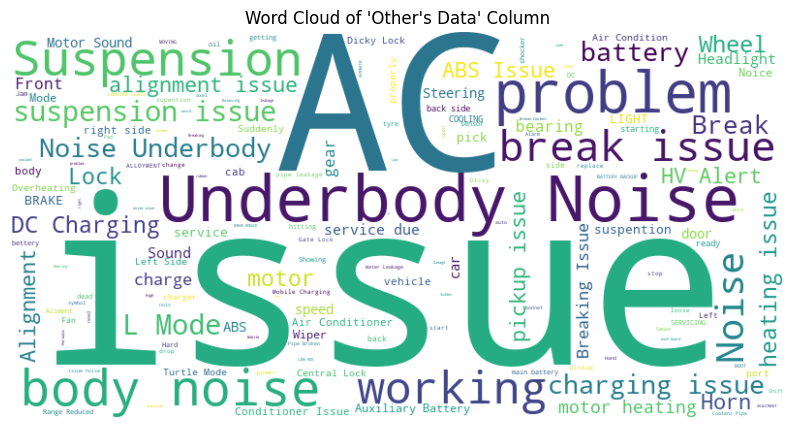

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(data["Other's Data"].dropna())

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Step 3: Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of 'Other's Data' Column")
plt.axis('off')
plt.show()


AC, Noise, Underbody, L mode, car issue

In [ ]:
data['Other\'s Data']

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
2332                 NaN
2333                 NaN
2334                 NaN
2335    Suspension issue
2336                 NaN
Name: Other's Data, Length: 2335, dtype: object

In [ ]:
data[["Other's Data"] == 'under body noise'].value_counts()

KeyError: False

In [ ]:
data[['Other\'s Data']=='under body noise'].value_counts()

KeyError: False

In [ ]:
filtered_data = data[data["Other's Data"] == 'under body noise']
value_counts = filtered_data["Other's Data"].value_counts()

In [ ]:
value_counts

Other's Data
under body noise    13
Name: count, dtype: int64

In [ ]:
categories = {
    'AC': ['ac', 'air condition'],
    'Noise': ['noise', 'sound', 'vibrate'],
    'Underbody': ['under body', 'underbody'],
    'L mode': ['l mode'],
    'Car Issue': ['issue', 'problem', 'not working', 'not moving', 'dead', 'not ready', 'service due', 'break down']
}

def classify_entry(entry):
    entry_lower = entry.lower()
    entry_categories = []
    
    for category, keywords in categories.items():
        if any(keyword in entry_lower for keyword in keywords):
            entry_categories.append(category)
    
    return ', '.join(entry_categories)

# Apply classification
data['Service_type_classified'] = data["Other's Data"].apply(classify_entry)

AttributeError: 'float' object has no attribute 'lower'

In [ ]:
data = {'other\'s data': [line.strip() for line in data.split('\n') if line.strip()]}
df = pd.DataFrame(data)

ac_keywords = ['ac', 'air condition', 'air-condition', 'colling']
l_mode_keywords = ['l mode', 'mode', 'f mode', 'turtle mode']
noise_keywords = ['noise', 'noisy', 'sound', 'vibrate', 'vibrating']
underbody_keywords = ['underbody', 'under body', 'unde body']

df['service_type_classified'] = ''

for index, row in df.iterrows():
    issue = row["other's data"].lower()
    if any(keyword in issue for keyword in ac_keywords):
        df.at[index, 'service_type_classified'] = 'air conditioner issue'
    elif any(keyword in issue for keyword in l_mode_keywords):
        df.at[index, 'service_type_classified'] = 'L mode'
    elif any(keyword in issue for keyword in noise_keywords):
        df.at[index, 'service_type_classified'] = 'Noise'
    elif any(keyword in issue for keyword in underbody_keywords):
        df.at[index, 'service_type_classified'] = 'Underbody'
    elif issue:
        df.at[index, 'service_type_classified'] = 'car issue'

print(df)


AttributeError: 'DataFrame' object has no attribute 'split'

In [ ]:
import pandas as pd
ac_keywords = ['ac', 'air condition', 'air-condition', 'colling']
l_mode_keywords = ['l mode', 'mode', 'f mode', 'turtle mode']
noise_keywords = ['noise', 'noisy', 'sound', 'vibrate', 'vibrating']
underbody_keywords = ['underbody', 'under body', 'unde body']

data["Other\'s Data"] = data["Other\'s Data"].astype(str)

for index, row in data.iterrows():
    issue = row["Other\'s Data"].lower()
    if any(keyword in issue for keyword in ac_keywords):
        data.at[index, 'Service_type_classified'] = 'Air Conditioner Issue'
    elif any(keyword in issue for keyword in l_mode_keywords):
        data.at[index, 'Service_type_classified'] = 'L Mode'
    elif any(keyword in issue for keyword in noise_keywords):
        data.at[index, 'Service_type_classified'] = 'Noise'
    elif any(keyword in issue for keyword in underbody_keywords):
        data.at[index, 'Service_type_classified'] = 'Underbody'
    elif issue:
        data.at[index, 'Service_type_classified'] = 'car issue'

print(data)

      SL No. Registration Number Delivery Date (from Registration Number)  \
0          1           WB07K0548                                1/10/2022   
1          2           WB05A0177                                25/1/2023   
2          3           WB05A0881                                25/5/2023   
3          4           WB05A0911                                30/5/2023   
4          5           WB07K0251                                22/7/2022   
...      ...                 ...                                      ...   
2332    2394           WB05A0893                                29/5/2023   
2333    2395           WB07K2080                               23/12/2023   
2334    2396           WB04J2467                               28/11/2023   
2335    2397           WB05A1878                               27/11/2023   
2336    2398           WB05A0857                                 3/6/2023   

      Current Vehicle Age in Months            Model         Hub  Date Sent

In [ ]:
data['service_type_classified'].value_counts()

service_type_classified
car issue                1824
Noise                     259
Air Conditioner Issue     184
L mode                     48
Underbody                  20
Name: count, dtype: int64

In [ ]:
data.loc[data['Service Type'].isin(['Periodic Service']), 'Service_type_classified'] = 'Periodic Service'
data.loc[data['Service Type'].isin(['L Mode']), 'Service_type_classified'] = 'L Mode'
data.loc[data['Service Type'].isin(['Overheating Issue']), 'Service_type_classified'] = 'Overheating Issue'
data.loc[data['Service Type'].isin(['AC Charging Issue', 'DC Charging Issue']), 'Service_type_classified'] = 'Charging'
data.loc[data['Service Type'].isin(['Air Conditioner Issue']), 'Service_type_classified'] = 'Air Conditioner Issue'
data.loc[data['Service Type'].isin(['First Free Service', 'Third Free Service', 'Second Free Service']), 'Service_type_classified'] = 'Free Service'


In [ ]:
data['Service_type_classified'].value_counts()

Service_type_classified
Air Conditioner Issue    762
car issue                401
Noise                    258
L Mode                   224
Free Service             213
Periodic Service         180
Overheating Issue        147
Charging                 130
Underbody                 20
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [ ]:
data_filtered=data[['Service_type_classified','Record ID','Registration Number','Invoice Amount','Date Sent','Date Received','Model','Service Vendors','Hub','Service KM Reading','Downtime']]

In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Service_type_classified  2335 non-null   object        
 1   Record ID                2335 non-null   object        
 2   Registration Number      2333 non-null   object        
 3   Invoice Amount           1604 non-null   object        
 4   Date Sent                2287 non-null   datetime64[ns]
 5   Date Received            2263 non-null   object        
 6   Model                    2333 non-null   object        
 7   Service Vendors          2288 non-null   object        
 8   Hub                      2333 non-null   object        
 9   Service KM Reading       882 non-null    float64       
 10  Downtime                 2251 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 283.4+ KB


In [ ]:
model_wise_service=data_filtered.groupby('Model')['Service_type_classified'].value_counts()
model_wise_service.to_excel("model_wise_service.xlsx",index=True)

In [ ]:
hub_wise_issues=data_filtered.groupby('Hub')['Service_type_classified'].value_counts()
hub_wise_issues.to_excel("Hub_wise_issues.xlsx",index=True)

In [ ]:
data_filtered['Invoice Amount'].isnull().sum()

731

In [ ]:
data_filtered.groupby('Service_type_classified')['Downtime'].mean()

Service_type_classified
Air Conditioner Issue    1.219008
Charging                 2.905512
Free Service             0.214286
L Mode                   3.675799
Noise                    0.718876
Overheating Issue        1.099291
Periodic Service         0.379310
Underbody                0.400000
car issue                1.384416
Name: Downtime, dtype: float64

In [ ]:
data_filtered.groupby('Registration Number')[data_filtered['Service_type_classified']=='L Mode'].value_counts()

KeyError: 'Columns not found: False, True'

In [ ]:
l_mode_data = data_filtered[data_filtered['Service_type_classified'] == 'L Mode']

l_mode_counts = l_mode_data.groupby('Registration Number')['Service_type_classified'].count()

In [ ]:
top_5_l_mode_counts = l_mode_counts.nlargest(5)
print(top_5_l_mode_counts)

Registration Number
WB07K0523    7
WB07K0348    6
WB07K1226    6
WB07K0312    5
WB07K0314    5
Name: Service_type_classified, dtype: int64


In [ ]:
data_filtered[data_filtered['Registration Number']=='WB07K0523']['Downtime'].sum()

27.0

In [ ]:
most_serviced=data_filtered.groupby('Registration Number')['Registration Number'].value_counts()
most_serviced.sort_values(ascending=False)

Registration Number
WB07K0523    15
WB07K0314    13
WB07K1200    12
WB07K1477    12
WB07K0348    12
             ..
WB04J4145     1
WB04J4139     1
WB04J4136     1
WB04J4135     1
WB05A1873     1
Name: count, Length: 613, dtype: int64

In [ ]:
data_filtered.groupby('Service Vendors')['Service_type_classified'].value_counts()

Service Vendors           Service_type_classified
Automovill                car issue                   23
                          Air Conditioner Issue        6
                          Noise                        4
Celica Motorcorp          Free Service                71
                          Periodic Service            25
                          Air Conditioner Issue       23
                          car issue                   15
                          L Mode                       6
                          Noise                        4
Dulichand                 Air Conditioner Issue      148
                          car issue                   87
                          L Mode                      79
                          Noise                       62
                          Periodic Service            50
                          Overheating Issue           39
                          Free Service                31
                          Charging    

In [ ]:
ac_issue_data=data_filtered[data_filtered['Service_type_classified']=='Air Conditioner Issue']

In [ ]:
ac_issue_data.groupby('Registration Number')['Registration Number'].value_counts().nlargest(25)

Registration Number
WB05A0948    8
WB07K0251    7
WB07K0605    7
WB04J0909    6
WB07K1007    6
WB07K1249    6
WB04J0915    5
WB05A0221    5
WB05A0264    5
WB07K0262    5
WB07K0267    5
WB07K0472    5
WB07K0520    5
WB07K0633    5
WB07K1200    5
WB07K1236    5
WB07K1247    5
WB07K1464    5
WB04J0905    4
WB04J0935    4
WB04J0969    4
WB04J1042    4
WB05A0235    4
WB05A0274    4
WB05A0907    4
Name: count, dtype: int64

In [ ]:
ac_issue_counts = ac_issue_data.groupby('Registration Number')['Service_type_classified'].count()
more_than_3times_ac_issue = ac_issue_counts[ac_issue_counts > 2]


In [ ]:
more_than_3times_ac_issue

Registration Number
WB04J0905    4
WB04J0909    6
WB04J0910    3
WB04J0915    5
WB04J0935    4
            ..
WB07K1481    3
WB07K1526    3
WB07K1810    3
WB07K1813    3
WB19L7423    3
Name: Service_type_classified, Length: 95, dtype: int64

In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Service_type_classified  2335 non-null   object        
 1   Record ID                2335 non-null   object        
 2   Registration Number      2333 non-null   object        
 3   Invoice Amount           1604 non-null   object        
 4   Date Sent                2287 non-null   datetime64[ns]
 5   Date Received            2263 non-null   object        
 6   Model                    2333 non-null   object        
 7   Service Vendors          2288 non-null   object        
 8   Hub                      2333 non-null   object        
 9   Service KM Reading       882 non-null    float64       
 10  Downtime                 2251 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 283.4+ KB


In [ ]:
import pandas as pd

ac_issue_data = data_filtered[data_filtered['Service_type_classified'] == 'Air Conditioner Issue']
ac_issue_counts = ac_issue_data.groupby('Registration Number')['Service_type_classified'].count()
more_than_3times_ac_issue_reg_nums = ac_issue_counts[ac_issue_counts > 2].index
ac_issue_data = ac_issue_data[ac_issue_data['Registration Number'].isin(more_than_3times_ac_issue_reg_nums)]
sorted_groups = ac_issue_data.sort_values('Date Sent').groupby('Registration Number')

time_diffs = sorted_groups['Date Sent'].diff().dropna()
avg_time_diffs = time_diffs.groupby(level=0).mean()
print(avg_time_diffs)

75       1 days
118      9 days
124      0 days
141      7 days
147      6 days
         ...   
2298   188 days
2299    68 days
2300     8 days
2313     5 days
2328     3 days
Name: Date Sent, Length: 248, dtype: timedelta64[ns]


In [ ]:
ac_issue_data = data_filtered[data_filtered['Service_type_classified'] == 'Air Conditioner Issue']
ac_issue_counts = ac_issue_data.groupby('Registration Number')['Service_type_classified'].count()

In [ ]:
ac_issue_data.groupby('Registration Number')['Service_type_classified'].count()

Registration Number
WB04J0905    4
WB04J0909    6
WB04J0910    3
WB04J0915    5
WB04J0925    1
            ..
WB07K2080    1
WB19L7423    3
WB19L7424    1
WB19L7529    1
WB19L7538    1
Name: Service_type_classified, Length: 389, dtype: int64

In [ ]:
ac_issue_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 0 to 2336
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Service_type_classified  762 non-null    object        
 1   Record ID                762 non-null    object        
 2   Registration Number      762 non-null    object        
 3   Invoice Amount           548 non-null    object        
 4   Date Sent                745 non-null    datetime64[ns]
 5   Date Received            730 non-null    object        
 6   Model                    762 non-null    object        
 7   Service Vendors          745 non-null    object        
 8   Hub                      762 non-null    object        
 9   Service KM Reading       325 non-null    float64       
 10  Downtime                 726 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 71.4+ KB


In [ ]:
import pandas as pd

ac_issue_data['Date Sent'] = pd.to_datetime(ac_issue_data['Date Sent'])
grouped = ac_issue_data.sort_values('Date Sent').groupby('Registration Number')
time_diffs = grouped['Date Sent'].diff().dropna()
avg_time_diffs = time_diffs.groupby(level=0).mean().reset_index()
avg_time_diffs = avg_time_diffs.rename(columns={'level_0': 'Registration Number', 0: 'Average Time Difference'})

print(avg_time_diffs)

     index Date Sent
0       75    1 days
1      118    9 days
2      124    0 days
3      125    3 days
4      139    6 days
..     ...       ...
352   2308   83 days
353   2313    5 days
354   2314   90 days
355   2326    2 days
356   2328    3 days

[357 rows x 2 columns]


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_35266/620969753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_issue_data['Date Sent'] = pd.to_datetime(ac_issue_data['Date Sent'])


In [ ]:
avg_time_diffs = avg_time_diffs.rename(columns={'level_0': 'Registration Number', 0: 'Average Time Difference'})

In [ ]:
avg_time_diffs

,index,Date Sent
0,75,1 days
1,118,9 days
2,124,0 days
3,125,3 days
4,139,6 days
...,...,...
352,2308,83 days
353,2313,5 days
354,2314,90 days
355,2326,2 days


In [ ]:
desc_ac_issue_data=ac_issue_data.groupby("Registration Number").describe()

In [ ]:
desc_ac_issue_data.to_excel("desc_ac_issue_data.xlsx",index=True)

In [ ]:
ac_issue_data['Registration Number'].nunique()

389

In [ ]:
grouped_data_ac = ac_issue_data.groupby(['Registration Number', 'Date Sent'])


In [ ]:
grouped_data_ac.head()

,Service_type_classified,Record ID,Registration Number,Invoice Amount,Date Sent,Date Received,Model,Service Vendors,Hub,Service KM Reading,Downtime
0,Air Conditioner Issue,recs10eh8smjEZ2b9,WB07K0548,NaN,2023-07-21,5/8/2023,Xpres-T Electra,TC Motors Foreshore Road,Khiderpore,NaN,15.0
1,Air Conditioner Issue,recjOVOk02NNWzy15,WB05A0177,NaN,2023-07-20,22/7/2023,Xpres-T Ziptron,TC Motors Foreshore Road,EVRE,NaN,2.0
4,Air Conditioner Issue,recOy5Xr7sk5vvy7h,WB07K0251,NaN,2023-07-21,21/7/2023,Xpres-T Electra,TC Motors Foreshore Road,HIDCO,NaN,0.0
15,Air Conditioner Issue,recveXiTQPZHqwjxy,WB07K1191,₹1609.00,2023-07-22,24/7/2023,Xpres-T Ziptron,TC Motors Foreshore Road,O2,NaN,2.0
27,Air Conditioner Issue,rechlqWdAEROIw7ID,WB07K0566,₹443.00,2023-07-25,26/7/2023,Xpres-T Electra,TC Motors Foreshore Road,HIDCO,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2326,Air Conditioner Issue,recNQfQKReXea3szr,WB05A1593,NaN,2024-05-24,NaN,Xpres-T Ziptron,Rangeview Motors,EVRE,NaN,NaN
2328,Air Conditioner Issue,rec2EbYj4b1QH8yRK,WB05A0935,NaN,2024-05-24,NaN,Xpres-T Ziptron,TC Motors Foreshore Road,O2,NaN,NaN
2331,Air Conditioner Issue,recyeuKtfsO7qp9dA,WB07K1452,NaN,2024-05-24,NaN,eC3,Celica Motorcorp,O2,NaN,NaN
2333,Air Conditioner Issue,rec0gIzu22Fueo5nB,WB07K2080,NaN,2024-05-24,NaN,Xpres-T Ziptron,TC Motors Foreshore Road,Axis,NaN,NaN


In [ ]:
ac_issue_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 0 to 2336
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Service_type_classified  762 non-null    object        
 1   Record ID                762 non-null    object        
 2   Registration Number      762 non-null    object        
 3   Invoice Amount           548 non-null    object        
 4   Date Sent                745 non-null    datetime64[ns]
 5   Date Received            730 non-null    object        
 6   Model                    762 non-null    object        
 7   Service Vendors          745 non-null    object        
 8   Hub                      762 non-null    object        
 9   Service KM Reading       325 non-null    float64       
 10  Downtime                 726 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 71.4+ KB


In [ ]:
import pandas as pd


ac_issue_data = ac_issue_data.sort_values(by=['Registration Number', 'Date Sent'])

grouped_data = ac_issue_data.groupby('Registration Number')

time_diff = grouped_data['Date Sent'].agg(['first', 'last'])
time_diff['time_diff'] = (time_diff['last'] - time_diff['first']).dt.days

repair_counts = grouped_data.size().reset_index(name='repair_counts')

time_diff = time_diff.reset_index()
merged_data = pd.merge(time_diff, repair_counts, on='Registration Number')

merged_data['average_time_between_repairs'] = merged_data['time_diff'] / (merged_data['repair_counts'] - 1)

merged_data.loc[merged_data['repair_counts'] == 1, 'average_time_between_repairs'] = None

print(merged_data[['Registration Number', 'average_time_between_repairs']])


    Registration Number  average_time_between_repairs
0             WB04J0905                     24.666667
1             WB04J0909                     19.800000
2             WB04J0910                     45.500000
3             WB04J0915                     61.750000
4             WB04J0925                           NaN
..                  ...                           ...
384           WB07K2080                           NaN
385           WB19L7423                     49.500000
386           WB19L7424                           NaN
387           WB19L7529                           NaN
388           WB19L7538                           NaN

[389 rows x 2 columns]


In [ ]:
merged_data.to_excel("Average span for ac.xlsx",index=True)

In [ ]:

ac_issue_data[ac_issue_data['Registration Number']=='WB04J2167']

,Service_type_classified,Record ID,Registration Number,Invoice Amount,Date Sent,Date Received,Model,Service Vendors,Hub,Service KM Reading,Downtime
2197,Air Conditioner Issue,recCDCDBIIDzS73Sh,WB04J2167,₹1687.00,2024-05-15,15/5/2024,Xpres-T Ziptron,Rangeview Motors,EVRE,28946.0,0.0
2059,Air Conditioner Issue,recj0YqFThftGRqn5,WB04J2167,NaN,NaT,NaN,Xpres-T Ziptron,NaN,EVRE,NaN,NaN


In [ ]:
ac_issue_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 810 to 1145
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Service_type_classified  762 non-null    object        
 1   Record ID                762 non-null    object        
 2   Registration Number      762 non-null    object        
 3   Invoice Amount           548 non-null    object        
 4   Date Sent                745 non-null    datetime64[ns]
 5   Date Received            730 non-null    object        
 6   Model                    762 non-null    object        
 7   Service Vendors          745 non-null    object        
 8   Hub                      762 non-null    object        
 9   Service KM Reading       325 non-null    float64       
 10  Downtime                 726 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 71.4+ KB


In [ ]:

ac_issue_data[ac_issue_data['Registration Number']=='WB07K0348']

,Service_type_classified,Record ID,Registration Number,Invoice Amount,Date Sent,Date Received,Model,Service Vendors,Hub,Service KM Reading,Downtime
217,Air Conditioner Issue,recvSUPnmohVVoCel,WB07K0348,₹2075.00,2023-08-28,28/8/2023,Xpres-T Electra,TC Motors Foreshore Road,HIDCO,NaN,0.0
247,Air Conditioner Issue,rectNpgQwXo4DrVN3,WB07K0348,₹1988.00,2023-09-01,1/9/2023,Xpres-T Electra,Dulichand,HIDCO,NaN,0.0
305,Air Conditioner Issue,recvd6oSitXqL9ZjB,WB07K0348,NaN,2023-09-11,13/9/2023,Xpres-T Electra,TC Motors Foreshore Road,HIDCO,NaN,2.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 33 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   SL No.                                                    2335 non-null   int64         
 1   Registration Number                                       2333 non-null   object        
 2   Delivery Date (from Registration Number)                  2333 non-null   object        
 3   Current Vehicle Age in Months                             2333 non-null   float64       
 4   Model                                                     2333 non-null   object        
 5   Hub                                                       2333 non-null   object        
 6   Date Sent                                                 2287 non-null   datetime64[ns]
 7   Date Received                                  

In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 2336
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Service_type_classified  2335 non-null   object        
 1   Record ID                2335 non-null   object        
 2   Registration Number      2333 non-null   object        
 3   Invoice Amount           1604 non-null   object        
 4   Date Sent                2287 non-null   datetime64[ns]
 5   Date Received            2263 non-null   object        
 6   Model                    2333 non-null   object        
 7   Service Vendors          2288 non-null   object        
 8   Hub                      2333 non-null   object        
 9   Service KM Reading       882 non-null    float64       
 10  Downtime                 2251 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 283.4+ KB


In [ ]:
data_filtered_new=data_filtered.merge(data[['Registration Number', 'Current Vehicle Age in Months']],
                                    on='Registration Number',
                                    how='inner')

In [ ]:
data_filtered_new

,Service_type_classified,Record ID,Registration Number,Invoice Amount,Date Sent,Date Received,Model,Service Vendors,Hub,Service KM Reading,Downtime,Current Vehicle Age in Months
0,Air Conditioner Issue,recs10eh8smjEZ2b9,WB07K0548,NaN,2023-07-21,5/8/2023,Xpres-T Electra,TC Motors Foreshore Road,Khiderpore,NaN,15.0,19.0
1,Air Conditioner Issue,recs10eh8smjEZ2b9,WB07K0548,NaN,2023-07-21,5/8/2023,Xpres-T Electra,TC Motors Foreshore Road,Khiderpore,NaN,15.0,19.0
2,Air Conditioner Issue,recs10eh8smjEZ2b9,WB07K0548,NaN,2023-07-21,5/8/2023,Xpres-T Electra,TC Motors Foreshore Road,Khiderpore,NaN,15.0,19.0
3,Charging,rec7ytYu3uDrNDRLZ,WB07K0548,NaN,2023-08-24,24/8/2023,Xpres-T Electra,TC Motors Foreshore Road,Khiderpore,NaN,0.0,19.0
4,Charging,rec7ytYu3uDrNDRLZ,WB07K0548,NaN,2023-08-24,24/8/2023,Xpres-T Electra,TC Motors Foreshore Road,Khiderpore,NaN,0.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12894,L Mode,recK7BgIfba8yb0eu,WB07K1873,NaN,2024-05-23,23/5/2024,Xpres-T Ziptron,Dulichand,Axis,NaN,0.0,7.0
12895,Free Service,recBHybs95OdR1t72,WB04J4173,NaN,2024-05-23,23/5/2024,eC3,Celica Motorcorp,Somponno,NaN,0.0,1.0
12896,Free Service,rec9HQSa6pAVthMCS,WB04J4190,NaN,2024-05-23,23/5/2024,eC3,Celica Motorcorp,Somponno,NaN,0.0,1.0
12897,Free Service,reccfYwb2MFNsqASl,WB04J4131,NaN,2024-05-23,23/5/2024,eC3,Celica Motorcorp,Somponno,NaN,0.0,1.0


In [ ]:
duplicate_rows_data = data_filtered_new[data_filtered_new.duplicated()]
print("Duplicate rows in data_filtered_new:")
print(duplicate_rows_data)

Duplicate rows in data_filtered_new:
      Service_type_classified          Record ID Registration Number  \
1       Air Conditioner Issue  recs10eh8smjEZ2b9           WB07K0548   
2       Air Conditioner Issue  recs10eh8smjEZ2b9           WB07K0548   
4                    Charging  rec7ytYu3uDrNDRLZ           WB07K0548   
5                    Charging  rec7ytYu3uDrNDRLZ           WB07K0548   
7       Air Conditioner Issue  recKxtt1GoRLf9U7O           WB07K0548   
...                       ...                ...                 ...   
12821   Air Conditioner Issue  recqMTm89oyQajp61           WB04J2467   
12825            Free Service  recVXuD2CEEjXezLF           WB04J4142   
12827            Free Service  recn0bpOG6FYxUL6T           WB04J4142   
12830   Air Conditioner Issue  recj0YqFThftGRqn5           WB04J2167   
12832   Air Conditioner Issue  recCDCDBIIDzS73Sh           WB04J2167   

      Invoice Amount  Date Sent Date Received            Model  \
1                NaN 2023-07-21 

In [ ]:
data_filtered_new = data_filtered_new.drop_duplicates()


In [ ]:
data_filtered_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 12898
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Service_type_classified        2335 non-null   object        
 1   Record ID                      2335 non-null   object        
 2   Registration Number            2333 non-null   object        
 3   Invoice Amount                 1604 non-null   object        
 4   Date Sent                      2287 non-null   datetime64[ns]
 5   Date Received                  2263 non-null   object        
 6   Model                          2333 non-null   object        
 7   Service Vendors                2288 non-null   object        
 8   Hub                            2333 non-null   object        
 9   Service KM Reading             882 non-null    float64       
 10  Downtime                       2251 non-null   float64       
 11  Current Vehicle Age i

In [ ]:
data_filtered=data_filtered_new
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 12898
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Service_type_classified        2335 non-null   object        
 1   Record ID                      2335 non-null   object        
 2   Registration Number            2333 non-null   object        
 3   Invoice Amount                 1604 non-null   object        
 4   Date Sent                      2287 non-null   datetime64[ns]
 5   Date Received                  2263 non-null   object        
 6   Model                          2333 non-null   object        
 7   Service Vendors                2288 non-null   object        
 8   Hub                            2333 non-null   object        
 9   Service KM Reading             882 non-null    float64       
 10  Downtime                       2251 non-null   float64       
 11  Current Vehicle Age i

In [ ]:
vehicle_age_wise_isse=data_filtered_new.groupby("Current Vehicle Age in Months")['Service_type_classified'].value_counts()

In [ ]:
vehicle_age_wise_isse.to_excel("Age Wise Issue counts.xlsx",index=True)

In [ ]:
vehicle_age_wise_isse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Current Vehicle Age in Months  119 non-null    float64
 1   Service_type_classified        119 non-null    object 
 2   Counts                         119 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
import matplotlib.pyplot as plt

# Assuming vehicle_age_wise_issue is the result of your groupby operation
# If it's a Series, you can convert it to a DataFrame for easier plotting
vehicle_age_wise_isse = vehicle_age_wise_isse.reset_index(name='Counts')

# Pivot the DataFrame for easier plotting
pivot_df = vehicle_age_wise_isse.pivot(index='Current Vehicle Age in Months', columns='Service_type_classified', values='Counts')

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Service Type Classified by Vehicle Age')
plt.xlabel('Vehicle Age in Months')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Service Type')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


TypeError: reset_index() got an unexpected keyword argument 'name'

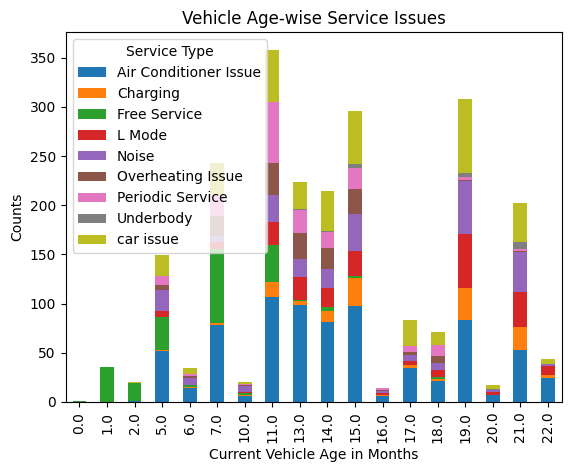

In [ ]:
import matplotlib.pyplot as plt

# Assuming vehicle_age_wise_issue is the result of your groupby operation
# If it's a Series, you can convert it to a DataFrame for easier plotting
vehicle_age_wise_isse = vehicle_age_wise_isse.reset_index()

# Rename the count column
vehicle_age_wise_isse = vehicle_age_wise_isse.rename(columns={0: 'Counts'})

# Pivot the DataFrame for easier plotting
pivot_df = vehicle_age_wise_isse.pivot(index='Current Vehicle Age in Months', columns='Service_type_classified', values='Counts')

# Plot the data
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Current Vehicle Age in Months')
plt.ylabel('Counts')
plt.title('Vehicle Age-wise Service Issues')
plt.legend(title='Service Type')
plt.show()


In [ ]:
free_service_11th_month = data_filtered[
    (data_filtered['Service_type_classified'] == 'Free Service') & 
    (data_filtered['Date Sent'].dt.month == 11)
]

# Get registration numbers of vehicles that went for service again in the 11th month
vehicles_twice_11th_month = free_service_11th_month[
    free_service_11th_month.duplicated(subset='Registration Number', keep=False)
]['Registration Number'].unique()

print("Vehicles that went for 'Free Service' in the 11th month and again went for service in the same month (11th month):")
print(vehicles_twice_11th_month)

Vehicles that went for 'Free Service' in the 11th month and again went for service in the same month (11th month):
[]


In [ ]:
data_filtered[data_filtered['Registration Number']=='WB04J2211']

,Service_type_classified,Record ID,Registration Number,Invoice Amount,Date Sent,Date Received,Model,Service Vendors,Hub,Service KM Reading,Downtime,Current Vehicle Age in Months
11164,Free Service,recc64frnVx2a3lV5,WB04J2211,NaN,2023-11-23,23/11/2023,Xpres-T Ziptron,TC Motors Foreshore Road,EVRE,NaN,0.0,7.0
11169,Free Service,recNkTSewTA3Sc6xo,WB04J2211,₹1744.00,2023-12-19,19/12/2023,Xpres-T Ziptron,TC Motors Foreshore Road,EVRE,NaN,0.0,7.0
11174,Free Service,recspvzSClDadoEQ8,WB04J2211,₹724.00,2024-02-19,19/2/2024,Xpres-T Ziptron,Rangeview Motors,EVRE,15001.0,0.0,7.0
11179,car issue,recTVNB8uf7iqpcc7,WB04J2211,NaN,2024-03-26,26/3/2024,Xpres-T Ziptron,TC Motors Foreshore Road,EVRE,NaN,0.0,7.0
11184,Periodic Service,recrvTeyCkeM6KCLV,WB04J2211,₹2867.00,2024-05-13,13/5/2024,Xpres-T Ziptron,Rangeview Motors,EVRE,28000.0,0.0,7.0


In [ ]:
data[data['Registration Number']=='WB04J2211']

,SL No.,Registration Number,Delivery Date (from Registration Number),Current Vehicle Age in Months,Model,Hub,Date Sent,Date Received,Received Month/Year,Vehicle Age At Service Time,...,Hub Manager Emails (from Hub) (from Registration Number),Rejection Reason,Sent Month/Year,Maintenance Remarks,Service KM Reading,Vehicle Status (from Registration Number),Record ID,Month,Service_type_classified,service_type_classified
672,673,WB04J2211,6/10/2023,7.0,Xpres-T Ziptron,EVRE,2023-11-23,23/11/2023,11/2023,48.0,...,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,11/2023,NaN,NaN,Running,recc64frnVx2a3lV5,11.0,Free Service,car issue
817,818,WB04J2211,6/10/2023,7.0,Xpres-T Ziptron,EVRE,2023-12-19,19/12/2023,12/2023,74.0,...,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,12/2023,NaN,NaN,Running,recNkTSewTA3Sc6xo,12.0,Free Service,car issue
1213,1214,WB04J2211,6/10/2023,7.0,Xpres-T Ziptron,EVRE,2024-02-19,19/2/2024,02/2024,136.0,...,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,02/2024,wip,15001.0,Running,recspvzSClDadoEQ8,2.0,Free Service,car issue
1544,1553,WB04J2211,6/10/2023,7.0,Xpres-T Ziptron,EVRE,2024-03-26,26/3/2024,03/2024,172.0,...,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,03/2024,Arrived\n,NaN,Running,recTVNB8uf7iqpcc7,3.0,car issue,car issue
2159,2217,WB04J2211,6/10/2023,7.0,Xpres-T Ziptron,EVRE,2024-05-13,13/5/2024,05/2024,220.0,...,"rajamahato1505@gmail.com,mrigankaguha.com@gmai...",NaN,05/2024,saurav Today,28000.0,Running,recrvTeyCkeM6KCLV,5.0,Periodic Service,car issue


In [ ]:
data_filtered['Service_type_classified'].unique()

array(['Air Conditioner Issue', 'Charging', 'car issue',
       'Periodic Service', 'L Mode', 'Overheating Issue', 'Noise',
       'Underbody', 'Free Service'], dtype=object)

In [ ]:
free_or_periodic_service = data_filtered[(data_filtered['Service_type_classified'] == 'Free Service') | (data_filtered['Service_type_classified'] == 'Periodic Service')]

free_or_periodic_service['Month_Sent'] = free_or_periodic_service['Date Sent'].dt.month

free_or_periodic_service['Prev_Month_Sent'] = free_or_periodic_service['Month_Sent'].shift(1)

same_month_service = free_or_periodic_service[free_or_periodic_service['Month_Sent'] == free_or_periodic_service['Prev_Month_Sent']]

registration_numbers = same_month_service['Registration Number'].unique()

print("Registration numbers of cars going into service in the same month as the previous service:")
print(registration_numbers)


Registration numbers of cars going into service in the same month as the previous service:
['WB04J0931' 'WB07K1465' 'WB04J0997' 'WB07K1453' 'WB05A0226' 'WB05A0264'
 'WB07K1101' 'WB07K1476' 'WB07K1267' 'WB07K0633' 'WB05A0293' 'WB07K0625'
 'WB07K1472' 'WB07K1180' 'WB07K1477' 'WB07K1467' 'WB07K1481' 'WB05A0912'
 'WB07K0637' 'WB05A0866' 'WB07K1533' 'WB07K1458' 'WB07K1186' 'WB07K1215'
 'WB05A0176' 'WB07K1176' 'WB07K1816' 'WB07K1175' 'WB05A1899' 'WB04J2333'
 'WB05A1568' 'WB04J2218' 'WB05A1649' 'WB05A1603' 'WB04J2330' 'WB19L7534'
 'WB05A1613' 'WB04J2606' 'WB07K0301' 'WB04J2572' 'WB07K2080' 'WB19L7549'
 'WB04J2264' 'WB19L7446' 'WB05A1558' 'WB07K1484' 'WB07K1243' 'WB04J2295'
 'WB19L7413' 'WB07K0641' 'WB04J2631' 'WB04J2465' 'WB04J2463' 'WB07K1817'
 'WB05A0940' 'WB04J2261' 'WB07K1824' 'WB05A1900' 'WB05A0860' 'WB04J2523'
 'WB04J2557' 'WB07K1837' 'WB04J4133' 'WB04J4198' 'WB04J4181' 'WB04J4135'
 'WB04J4187' 'WB05A2842' 'WB05A2803' 'WB04J4103' 'WB05A2824' 'WB05A2836'
 'WB04J4196' 'WB04J4176' 'WB04J41

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_35266/1157553121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_or_periodic_service['Month_Sent'] = free_or_periodic_service['Date Sent'].dt.month
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_35266/1157553121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_or_periodic_service['Prev_Month_Sent'] = free_or_periodic_service['Month_Sent'].shift(1)


In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 12898
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Service_type_classified        2335 non-null   object        
 1   Record ID                      2335 non-null   object        
 2   Registration Number            2333 non-null   object        
 3   Invoice Amount                 1604 non-null   object        
 4   Date Sent                      2287 non-null   datetime64[ns]
 5   Date Received                  2263 non-null   object        
 6   Model                          2333 non-null   object        
 7   Service Vendors                2288 non-null   object        
 8   Hub                            2333 non-null   object        
 9   Service KM Reading             882 non-null    float64       
 10  Downtime                       2251 non-null   float64       
 11  Current Vehicle Age i

In [ ]:
data_filtered=data_filtered.merge(data[['Registration Number', 'Delivery Date (from Registration Number)']],
                                    on='Registration Number',
                                    how='inner')

In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12899 entries, 0 to 12898
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Service_type_classified                   12899 non-null  object        
 1   Record ID                                 12899 non-null  object        
 2   Registration Number                       12895 non-null  object        
 3   Invoice Amount                            8799 non-null   object        
 4   Date Sent                                 12627 non-null  datetime64[ns]
 5   Date Received                             12503 non-null  object        
 6   Model                                     12895 non-null  object        
 7   Service Vendors                           12632 non-null  object        
 8   Hub                                       12895 non-null  object        
 9   Service KM Reading          

In [ ]:
data_filtered = data_filtered.drop_duplicates()


In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 12898
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Service_type_classified                   2335 non-null   object        
 1   Record ID                                 2335 non-null   object        
 2   Registration Number                       2333 non-null   object        
 3   Invoice Amount                            1604 non-null   object        
 4   Date Sent                                 2287 non-null   datetime64[ns]
 5   Date Received                             2263 non-null   object        
 6   Model                                     2333 non-null   object        
 7   Service Vendors                           2288 non-null   object        
 8   Hub                                       2333 non-null   object        
 9   Service KM Reading                

In [ ]:
data_filtered['Delivery Date (from Registration Number)'] = pd.to_datetime(data_filtered['Delivery Date (from Registration Number)'])
data_filtered['Current Vehicle Age in Months'] = (data_filtered['Date Sent'] - data_filtered['Delivery Date (from Registration Number)']) // np.timedelta64(1, 'M')


ValueError: time data "25/1/2023" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
data_filtered['Delivery Date (from Registration Number)'] = pd.to_datetime(data_filtered['Delivery Date (from Registration Number)'], format='%d/%m/%Y')
data_filtered['Current Vehicle Age in Months'] = (data_filtered['Date Sent'] - data_filtered['Delivery Date (from Registration Number)']) // np.timedelta64(1, 'M')


In [ ]:
data_filtered['Current Vehicle Age in Months'].unique()

array([ 9., 10., 16.,  5.,  8., 13., 14.,  1.,  2.,  3., 11.,  4.,  7.,
       17., 19., nan, 21., 12., 15., 18.,  6., 20.,  0.])

In [ ]:
data_filtered[data_filtered['Registration Number']=='WB05A0866']

,Service_type_classified,Record ID,Registration Number,Invoice Amount,Date Sent,Date Received,Model,Service Vendors,Hub,Service KM Reading,Downtime,Current Vehicle Age in Months,Delivery Date (from Registration Number)
8842,car issue,recnWWos1zRjy1Okt,WB05A0866,₹1693.00,2023-09-28,3/10/2023,Xpres-T Ziptron,TC Motors Foreshore Road,O2,NaN,5.0,4.0,2023-05-25
8849,car issue,rec5zZag2rT58gsTr,WB05A0866,NaN,2023-10-12,13/10/2023,Xpres-T Ziptron,TC Motors Foreshore Road,O2,NaN,1.0,4.0,2023-05-25
8856,Air Conditioner Issue,recLEtldzHAgykHy5,WB05A0866,₹446.00,2023-11-03,6/11/2023,Xpres-T Ziptron,TC Motors Foreshore Road,O2,NaN,3.0,5.0,2023-05-25
8863,Charging,rect3jzS8SCSjLdFI,WB05A0866,NaN,2024-01-10,11/1/2024,Xpres-T Ziptron,TC Motors Foreshore Road,O2,NaN,1.0,7.0,2023-05-25
8870,Periodic Service,recs4Oz0nxkcVhih4,WB05A0866,₹5002.00,2024-03-28,28/3/2024,Xpres-T Ziptron,Dulichand,O2,44033.0,0.0,9.0,2023-05-25
8877,L Mode,recQJbWz13hBMQrhD,WB05A0866,NaN,2024-04-20,NaN,Xpres-T Ziptron,NaN,O2,NaN,NaN,10.0,2023-05-25
8884,Air Conditioner Issue,recvSg6XckVDcTwtB,WB05A0866,₹1150.00,2024-05-15,15/5/2024,Xpres-T Ziptron,Speedy Autocare,O2,50267.0,0.0,11.0,2023-05-25


In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2335 entries, 0 to 12898
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Service_type_classified                   2335 non-null   object        
 1   Record ID                                 2335 non-null   object        
 2   Registration Number                       2333 non-null   object        
 3   Invoice Amount                            1604 non-null   object        
 4   Date Sent                                 2287 non-null   datetime64[ns]
 5   Date Received                             2263 non-null   object        
 6   Model                                     2333 non-null   object        
 7   Service Vendors                           2288 non-null   object        
 8   Hub                                       2333 non-null   object        
 9   Service KM Reading                

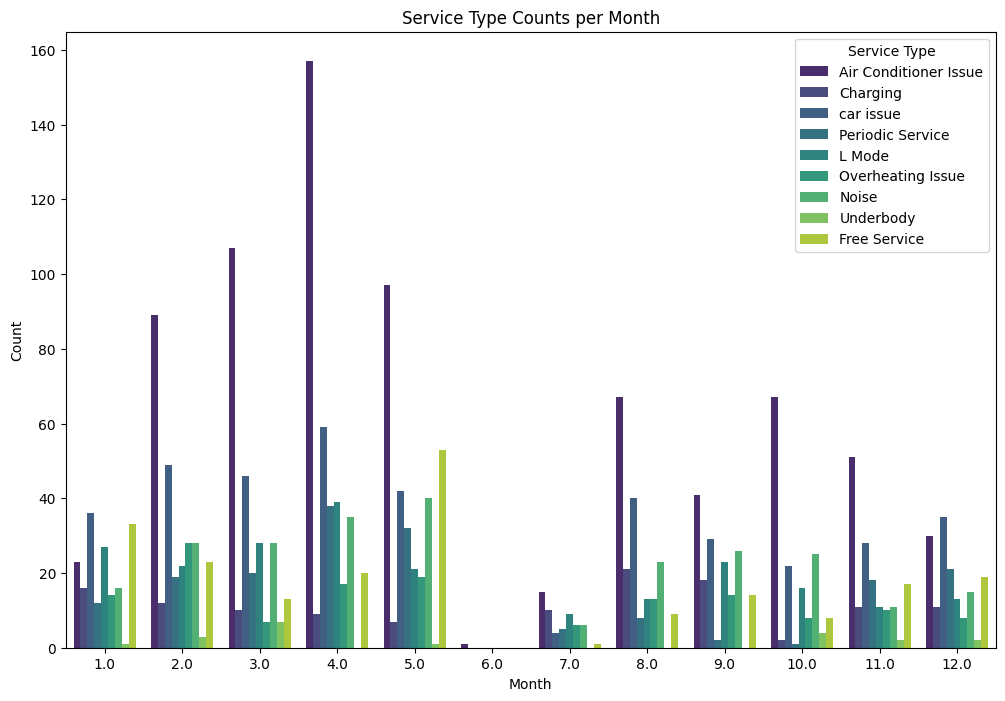

In [ ]:
data_filtered['Sent_Month'] = data_filtered['Date Sent'].dt.month
plt.figure(figsize=(12, 8))
sns.countplot(data=data_filtered, x='Sent_Month', hue='Service_type_classified', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Service Type Counts per Month')
plt.legend(title='Service Type')
plt.show()

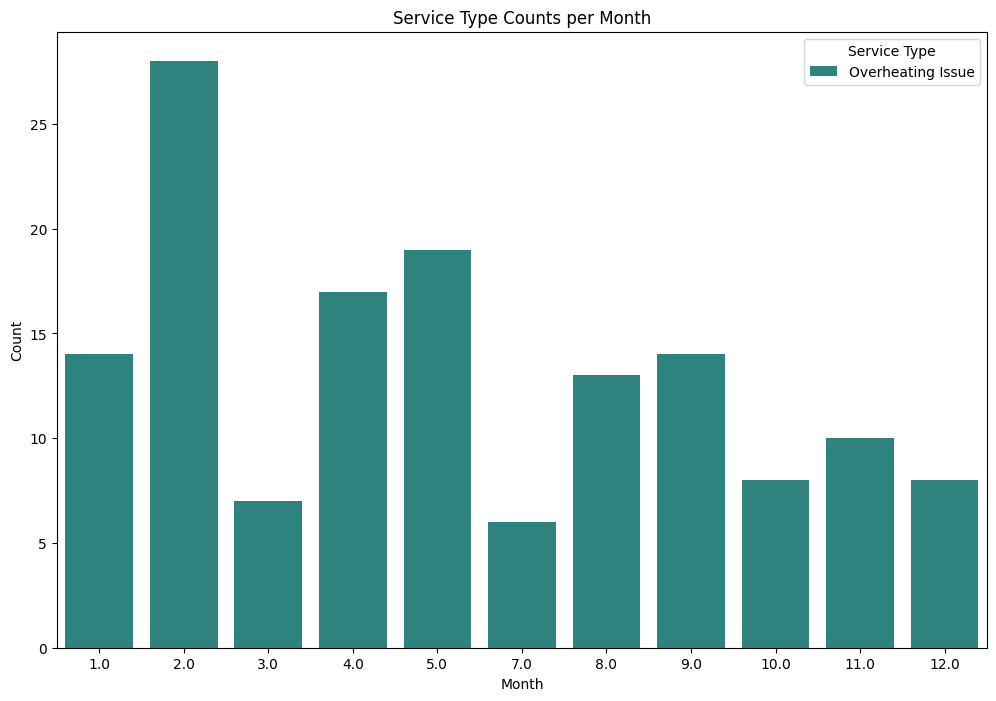

In [ ]:
data_filtered['Sent_Month'] = data_filtered['Date Sent'].dt.month
data_overheating=data_filtered[data_filtered['Service_type_classified']=='Overheating Issue']
plt.figure(figsize=(12, 8))
sns.countplot(data=data_overheating, x='Sent_Month', hue='Service_type_classified', palette='viridis')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Service Type Counts per Month')
plt.legend(title='Service Type')
plt.show()

In [ ]:
issue_count=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/Keytakeaways/issue_counts_list.xlsx")

In [ ]:
new_df=issue_count

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       613 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [ ]:

# Split the column on ": Total: "
new_df[['issue_details', 'Total']] = new_df[0].str.split(', Total: ', expand=True)

# Update the original column to contain everything except the Total value
new_df[0] = new_df['issue_details'].str.split(':').str[1]



                          0  \
0     Air Conditioner Issue   
1     Air Conditioner Issue   
2     Air Conditioner Issue   
3     Air Conditioner Issue   
4                    L Mode   
..                      ...   
608   Air Conditioner Issue   
609      First Free Service   
610   Air Conditioner Issue   
611        Periodic Service   
612                   Other   

                                         issue_details Total  
0        WB04J0905: Air Conditioner Issue: 2, Other: 4     6  
1        WB04J0909: Air Conditioner Issue: 5, Other: 2     7  
2    WB04J0910: Air Conditioner Issue: 3, L Mode: 1...     7  
3    WB04J0915: Air Conditioner Issue: 4, L Mode: 1...     7  
4                       WB04J0925: L Mode: 1, Other: 3     4  
..                                                 ...   ...  
608                WB19L7529: Air Conditioner Issue: 1     1  
609                   WB19L7534: First Free Service: 1     1  
610  WB19L7538: Air Conditioner Issue: 1, Overheati...     2

In [ ]:
new_df.head()

,0,issue_details,Total
0,Air Conditioner Issue,"WB04J0905: Air Conditioner Issue: 2, Other: 4",6
1,Air Conditioner Issue,"WB04J0909: Air Conditioner Issue: 5, Other: 2",7
2,Air Conditioner Issue,"WB04J0910: Air Conditioner Issue: 3, L Mode: 1...",7
3,Air Conditioner Issue,"WB04J0915: Air Conditioner Issue: 4, L Mode: 1...",7
4,L Mode,"WB04J0925: L Mode: 1, Other: 3",4


In [ ]:
new_df.to_excel("issue_counts_list.xlsx",index=False)

In [ ]:
data_filtered['Service_type_classified'].value_counts()

Service_type_classified
Air Conditioner Issue    762
car issue                401
Noise                    258
L Mode                   224
Free Service             213
Periodic Service         180
Overheating Issue        147
Charging                 130
Underbody                 20
Name: count, dtype: int64

In [ ]:
issue_counts = data_filtered.pivot_table(index='Registration Number', columns='Service_type_classified', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

for reg_num, issues in issue_counts_dict.items():
    print(f"{reg_num}: {issues}")

issue_counts = data_filtered.pivot_table(index='Registration Number', columns='Service_type_classified', aggfunc='size', fill_value=0)

issue_counts_dict = issue_counts.to_dict(orient='index')

issue_counts_list = []

for reg_num, issues in issue_counts_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

for entry in issue_counts_list:
    print(entry)


processed_dict = {}

for reg_num, issues in issue_counts_dict.items():
    # Filter out keys with values of 0
    filtered_issues = {k: v for k, v in issues.items() if v != 0}
    # Calculate the total of non-zero values
    total = sum(filtered_issues.values())
    # Add the total to the dictionary
    filtered_issues['Total'] = total
    # Store the processed dictionary
    processed_dict[reg_num] = filtered_issues

# Convert the processed dictionary to a list of formatted strings
issue_counts_list = []

for reg_num, issues in processed_dict.items():
    issues_str = ", ".join(f"{issue}: {count}" for issue, count in issues.items())
    issue_counts_list.append(f"{reg_num}: {issues_str}")

# Print the resulting list
for entry in issue_counts_list:
    print(entry)

WB04J0905: {'Air Conditioner Issue': 4, 'Charging': 0, 'Free Service': 0, 'L Mode': 0, 'Noise': 1, 'Overheating Issue': 0, 'Periodic Service': 0, 'Underbody': 0, 'car issue': 1}
WB04J0909: {'Air Conditioner Issue': 6, 'Charging': 0, 'Free Service': 0, 'L Mode': 0, 'Noise': 0, 'Overheating Issue': 0, 'Periodic Service': 0, 'Underbody': 0, 'car issue': 1}
WB04J0910: {'Air Conditioner Issue': 3, 'Charging': 0, 'Free Service': 0, 'L Mode': 2, 'Noise': 0, 'Overheating Issue': 0, 'Periodic Service': 0, 'Underbody': 0, 'car issue': 2}
WB04J0915: {'Air Conditioner Issue': 5, 'Charging': 0, 'Free Service': 0, 'L Mode': 1, 'Noise': 1, 'Overheating Issue': 0, 'Periodic Service': 0, 'Underbody': 0, 'car issue': 0}
WB04J0925: {'Air Conditioner Issue': 1, 'Charging': 0, 'Free Service': 0, 'L Mode': 1, 'Noise': 0, 'Overheating Issue': 0, 'Periodic Service': 0, 'Underbody': 0, 'car issue': 2}
WB04J0931: {'Air Conditioner Issue': 0, 'Charging': 1, 'Free Service': 1, 'L Mode': 0, 'Noise': 1, 'Overheatin

In [ ]:
issue_counts_list


['WB04J0905: Air Conditioner Issue: 4, Noise: 1, car issue: 1, Total: 6',
 'WB04J0909: Air Conditioner Issue: 6, car issue: 1, Total: 7',
 'WB04J0910: Air Conditioner Issue: 3, L Mode: 2, car issue: 2, Total: 7',
 'WB04J0915: Air Conditioner Issue: 5, L Mode: 1, Noise: 1, Total: 7',
 'WB04J0925: Air Conditioner Issue: 1, L Mode: 1, car issue: 2, Total: 4',
 'WB04J0931: Charging: 1, Free Service: 1, Noise: 1, car issue: 2, Total: 5',
 'WB04J0935: Air Conditioner Issue: 4, Charging: 1, Overheating Issue: 1, car issue: 1, Total: 7',
 'WB04J0939: Air Conditioner Issue: 1, L Mode: 1, Periodic Service: 1, Total: 3',
 'WB04J0943: Air Conditioner Issue: 2, L Mode: 2, Noise: 1, Overheating Issue: 1, car issue: 1, Total: 7',
 'WB04J0946: Air Conditioner Issue: 1, Noise: 1, car issue: 2, Total: 4',
 'WB04J0949: Air Conditioner Issue: 3, L Mode: 1, Total: 4',
 'WB04J0957: Air Conditioner Issue: 2, L Mode: 2, car issue: 2, Total: 6',
 'WB04J0963: Air Conditioner Issue: 1, Overheating Issue: 2, car 

In [ ]:
import pandas as pd

# Split each string element in the list into separate columns
split_data = [item.split(": ") for item in issue_counts_list]

# Create a DataFrame from the list of lists
df = pd.DataFrame(issue_counts_list)

# Display the DataFrame
print(df)


                                                     0
0    WB04J0905: Air Conditioner Issue: 4, Noise: 1,...
1    WB04J0909: Air Conditioner Issue: 6, car issue...
2    WB04J0910: Air Conditioner Issue: 3, L Mode: 2...
3    WB04J0915: Air Conditioner Issue: 5, L Mode: 1...
4    WB04J0925: Air Conditioner Issue: 1, L Mode: 1...
..                                                 ...
608      WB19L7529: Air Conditioner Issue: 1, Total: 1
609               WB19L7534: Free Service: 1, Total: 1
610  WB19L7538: Air Conditioner Issue: 1, Overheati...
611  WB19L7549: Free Service: 2, Periodic Service: ...
612                      WB19L7693: Noise: 2, Total: 2

[613 rows x 1 columns]


In [ ]:
df.to_excel('issue_counts_list.xlsx', index=False)


In [ ]:
issue_count=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/Vehicle Repair Dashboard/issue_counts_list.xlsx")
new_df=issue_count


In [ ]:
# Split the column on ": Total: "
new_df[['issue_details', 'Total']] = new_df[0].str.split(', Total: ', expand=True)

# Update the original column to contain everything except the Total value
new_df[0] = new_df['issue_details'].str.split(':').str[1]
new_df.to_excel("issue_counts_list.xlsx",index=False)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   0              613 non-null    object
 1   issue_details  613 non-null    object
 2   Total          613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB
